# Introduction
**Author: Samanyu**<br>
**Language: Python**<br>
**Accelerator: None**

In [540]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report,confusion_matrix

import re

from statsmodels.graphics.mosaicplot import mosaic

# Reading and Displaying Dataset

In [480]:
df=pd.read_csv(r"C:\Users\Samanyu K\Downloads\Auto Sales data.csv")
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,01/03/2020,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,28/03/2020,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


# Data Preprocessing

In [481]:
# First let us drop duplicates then focus in filling up Null values
df.drop_duplicates(inplace=True)
print(df.isnull().sum())
print(df.info())

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5 

In [482]:
# No null values or duplicates yaaay :)
# Let us go feature by feature and standardize it
# No preprocessing needed with Order number and Quantity Ordered, let us look into Price Each
df['PRICEEACH'].value_counts()

PRICEEACH
59.87    6
96.34    6
61.99    5
57.73    5
67.14    5
        ..
56.12    1
40.22    1
87.15    1
43.70    1
53.63    1
Name: count, Length: 1843, dtype: int64

In [483]:
# No problem with Prices, let us look into Order line number,DAYS_SINCE_LASTORDER and Sales
print(df['ORDERLINENUMBER'])
print(df['DAYS_SINCE_LASTORDER'])
print(df['SALES'])

0        2
1        5
2        2
3        6
4        1
        ..
2742    15
2743     1
2744     4
2745     1
2746     9
Name: ORDERLINENUMBER, Length: 2747, dtype: int64
0        828
1        757
2        703
3        649
4        586
        ... 
2742    2924
2743    2865
2744    2836
2745    2810
2746    2772
Name: DAYS_SINCE_LASTORDER, Length: 2747, dtype: int64
0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       3479.76
         ...   
2742    2244.40
2743    3978.51
2744    5417.57
2745    2116.16
2746    3079.44
Name: SALES, Length: 2747, dtype: float64


In [484]:
# OrderLine number,DAYS_SINCE_LASTORDER and sales have no issues
# moving on to order date
df['ORDERDATE'].value_counts()

ORDERDATE
14/11/2018    38
24/11/2019    35
12/11/2018    34
17/11/2019    32
04/11/2019    29
              ..
20/04/2019     1
13/08/2018     1
11/04/2018     1
02/03/2020     1
21/04/2018     1
Name: count, Length: 246, dtype: int64

In [485]:
# Let us change this column to DateType
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%d/%m/%Y')

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [487]:
# Let us look into Status adnd Product Line
print(df['STATUS'].value_counts())
print(df['PRODUCTLINE'].value_counts())

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64
PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64


In [488]:
# taking a look into ProductCode and CustomerName
print(df['PRODUCTCODE'].value_counts())
print(df['CUSTOMERNAME'].value_counts())

PRODUCTCODE
S18_3232    51
S50_1392    28
S32_2509    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_1749    21
S18_2248    21
S18_4409    21
S24_3969    21
Name: count, Length: 109, dtype: int64
CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Auto-Moto Classics Inc.           8
Royale Belge                      8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: count, Length: 89, dtype: int64


In [489]:
# We dont have a problem with Product Code let us take a deeper look inot Customer Name
d=df['CUSTOMERNAME'].value_counts().reset_index(name='Count')
for index, row in d.iterrows():
    customer_name = row['CUSTOMERNAME']
    count = row['Count']
    print(f"Customer: {customer_name} Count: {count}")

Customer: Euro Shopping Channel Count: 259
Customer: Mini Gifts Distributors Ltd. Count: 180
Customer: Australian Collectors, Co. Count: 55
Customer: La Rochelle Gifts Count: 53
Customer: AV Stores, Co. Count: 51
Customer: Land of Toys Inc. Count: 49
Customer: Muscle Machine Inc Count: 48
Customer: Rovelli Gifts Count: 48
Customer: Souveniers And Things Co. Count: 46
Customer: Anna's Decorations, Ltd Count: 46
Customer: Dragon Souveniers, Ltd. Count: 43
Customer: Saveley & Henriot, Co. Count: 41
Customer: Reims Collectables Count: 41
Customer: Salzburg Collectables Count: 40
Customer: The Sharp Gifts Warehouse Count: 40
Customer: L'ordine Souveniers Count: 39
Customer: Scandinavian Gift Ideas Count: 38
Customer: Danish Wholesale Imports Count: 36
Customer: Handji Gifts& Co Count: 36
Customer: Mini Creations Ltd. Count: 35
Customer: Online Diecast Creations Co. Count: 34
Customer: Technics Stores Inc. Count: 34
Customer: Corrida Auto Replicas, Ltd Count: 32
Customer: Oulu Toy Supplies, 

In [490]:
# Nothing major, but we have to remove some commas at the end or in the middle of the names
df['CUSTOMERNAME']=df['CUSTOMERNAME'].str.replace(',','')

d=df['CUSTOMERNAME'].value_counts().reset_index(name='Count')
for index, row in d.iterrows():
    customer_name = row['CUSTOMERNAME']
    count = row['Count']
    print(f"Customer: {customer_name} Count: {count}")

Customer: Euro Shopping Channel Count: 259
Customer: Mini Gifts Distributors Ltd. Count: 180
Customer: Australian Collectors Co. Count: 55
Customer: La Rochelle Gifts Count: 53
Customer: AV Stores Co. Count: 51
Customer: Land of Toys Inc. Count: 49
Customer: Muscle Machine Inc Count: 48
Customer: Rovelli Gifts Count: 48
Customer: Souveniers And Things Co. Count: 46
Customer: Anna's Decorations Ltd Count: 46
Customer: Dragon Souveniers Ltd. Count: 43
Customer: Saveley & Henriot Co. Count: 41
Customer: Reims Collectables Count: 41
Customer: Salzburg Collectables Count: 40
Customer: The Sharp Gifts Warehouse Count: 40
Customer: L'ordine Souveniers Count: 39
Customer: Scandinavian Gift Ideas Count: 38
Customer: Danish Wholesale Imports Count: 36
Customer: Handji Gifts& Co Count: 36
Customer: Mini Creations Ltd. Count: 35
Customer: Online Diecast Creations Co. Count: 34
Customer: Technics Stores Inc. Count: 34
Customer: Corrida Auto Replicas Ltd Count: 32
Customer: Oulu Toy Supplies Inc. Co

In [491]:
# Let us take a look at the Phone Feature
d=df['PHONE'].value_counts().reset_index(name='count')

for i, row in d.iterrows():
    print(row['PHONE'],'->' ,row['count'])

(91) 555 94 44 -> 259
4155551450 -> 180
03 9520 4555 -> 55
40.67.8555 -> 53
(171) 555-1555 -> 51
6175558555 -> 51
2125557818 -> 49
2125557413 -> 48
035-640555 -> 48
+61 2 9495 8555 -> 46
02 9936 8555 -> 46
+65 221 7555 -> 43
26.47.1555 -> 41
78.32.5555 -> 41
4085553659 -> 40
6562-9555 -> 40
0522-556555 -> 39
0695-34 6555 -> 38
31 12 3555 -> 36
+65 224 1555 -> 36
5085559555 -> 35
6505556809 -> 34
6035558647 -> 34
(91) 555 22 82 -> 32
+81 3 3584 0555 -> 32
07-98 9555 -> 32
981-443655 -> 32
0897-034555 -> 31
2155551555 -> 31
+358 9 8045 555 -> 30
90-224 8555 -> 30
6265557265 -> 30
+47 2267 3215 -> 29
(171) 555-2282 -> 29
7025551838 -> 29
86 21 3555 -> 27
(1) 47.55.6555 -> 27
+63 2 555 3587 -> 26
5085552555 -> 26
6175559555 -> 26
(604) 555-4555 -> 26
(171) 555-0297 -> 26
011-4988555 -> 26
(198) 555-8888 -> 26
9145554562 -> 26
0221-5554327 -> 26
2035552570 -> 25
2125551500 -> 25
(02) 5554 67 -> 25
7605558146 -> 25
91.24.4555 -> 25
+47 2212 1555 -> 24
61-9-3844-6555 -> 23
2155559857 -> 23
(9

In [492]:
df['PHONE']=df['PHONE'].str.strip()
df['PHONE']=df['PHONE'].str.replace(" ",'')
df['PHONE'] = df['PHONE'].str.replace(r'[.()+-]', '', regex=True)

In [493]:
# We have varied length of phone number from length 8 to 12 now let us try and divide that into 2numbers-4numbers-the remaining
df['PHONE']=df['PHONE'].apply(lambda x:'+'+x[:2]+' '+x[2:] if len(x)==12 else x)

d=df['PHONE'].value_counts().reset_index(name='count')
for i, row in d.iterrows():
    print(row['PHONE'],'->' ,row['count'],'length->',len(row['PHONE']))

915559444 -> 259 length-> 9
4155551450 -> 180 length-> 10
0395204555 -> 55 length-> 10
40678555 -> 53 length-> 8
1715551555 -> 51 length-> 10
6175558555 -> 51 length-> 10
2125557818 -> 49 length-> 10
2125557413 -> 48 length-> 10
035640555 -> 48 length-> 9
61294958555 -> 46 length-> 11
0299368555 -> 46 length-> 10
652217555 -> 43 length-> 9
26471555 -> 41 length-> 8
78325555 -> 41 length-> 8
4085553659 -> 40 length-> 10
65629555 -> 40 length-> 8
0522556555 -> 39 length-> 10
0695346555 -> 38 length-> 10
31123555 -> 36 length-> 8
652241555 -> 36 length-> 9
5085559555 -> 35 length-> 10
6505556809 -> 34 length-> 10
6035558647 -> 34 length-> 10
915552282 -> 32 length-> 9
81335840555 -> 32 length-> 11
07989555 -> 32 length-> 8
981443655 -> 32 length-> 9
0897034555 -> 31 length-> 10
2155551555 -> 31 length-> 10
35898045555 -> 30 length-> 11
902248555 -> 30 length-> 9
6265557265 -> 30 length-> 10
4722673215 -> 29 length-> 10
1715552282 -> 29 length-> 10
7025551838 -> 29 length-> 10
86213555 -> 

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [495]:
print(df['ADDRESSLINE1'].value_counts())
print(df['CITY'].value_counts())
print(df['COUNTRY'].value_counts())

ADDRESSLINE1
C/ Moralzarzal, 86              259
5677 Strong St.                 180
636 St Kilda Road                55
67, rue des Cinquante Otages     53
Fauntleroy Circus                51
                               ... 
5290 North Pendale Street        10
16780 Pompton St.                 8
Boulevard Tirou, 255              8
54, rue Royale                    7
4097 Douglas Av.                  3
Name: count, Length: 89, dtype: int64
CITY
Madrid        304
San Rafael    180
NYC           152
Singapore      79
Paris          70
             ... 
Graz           15
Brisbane       15
Munich         14
Burbank        13
Charleroi       8
Name: count, Length: 71, dtype: int64
COUNTRY
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33


In [496]:
# no changes need for the country let us look deeper into Address line as well as city
u=df['ADDRESSLINE1'].value_counts().reset_index(name='count')
for i,d in u.iterrows():
    print(d['ADDRESSLINE1'],'->',d['count'])

C/ Moralzarzal, 86 -> 259
5677 Strong St. -> 180
636 St Kilda Road -> 55
67, rue des Cinquante Otages -> 53
Fauntleroy Circus -> 51
897 Long Airport Avenue -> 49
4092 Furth Circle -> 48
Via Ludovico il Moro 22 -> 48
Monitor Money Building, 815 Pacific Hwy -> 46
201 Miller Street -> 46
Bronz Sok., Bronz Apt. 3/6 Tesvikiye -> 43
2, rue du Commerce -> 41
59 rue de l'Abbaye -> 41
Geislweg 14 -> 40
3086 Ingle Ln. -> 40
Strada Provinciale 124 -> 39
?kergatan 24 -> 38
Vinb'ltet 34 -> 36
Village Close - 106 Linden Road Sandown -> 36
4575 Hillside Dr. -> 35
2304 Long Airport Avenue -> 34
9408 Furth Circle -> 34
C/ Araquil, 67 -> 32
Torikatu 38 -> 32
Erling Skakkes gate 78 -> 32
2-2-8 Roppongi -> 32
7586 Pompton St. -> 31
Grenzacherweg 237 -> 31
Software Engineering Center, SEC Oy -> 30
Keskuskatu 45 -> 30
78934 Hillside Dr. -> 30
Berkeley Gardens 12  Brewery -> 29
8489 Strong St. -> 29
Drammen 121, PR 744 Sentrum -> 29
25, rue Lauriston -> 27
Smagsloget 45 -> 27
39323 Spinnaker Dr. -> 27
15 McC

In [497]:
def clean_address(addr):
    addr = re.sub(r"(?i)^C/\s*", "", addr)
    addr = re.sub(r",", "", addr)
    addr = re.sub(r"[^\w\s\-./#]", "", addr)
    addr = re.sub(r"\bSt\.\b", "Street", addr, flags=re.IGNORECASE)
    addr = re.sub(r"\bAv\.\b", "Avenue", addr, flags=re.IGNORECASE)
    addr = re.sub(r"\s+", " ", addr).strip()
    addr = addr.title()
    return addr

df['CleanedADDRESSLINE1'] = df['ADDRESSLINE1'].replace(np.nan, '', regex=True).apply(clean_address)
df.drop(columns='ADDRESSLINE1',inplace=True)
u=df['CleanedADDRESSLINE1'].value_counts().reset_index(name='count')
for i,d in u.iterrows():
    print(d['CleanedADDRESSLINE1'],'->',d['count'])

# the address can be furthur split into street number and name but we wont be doing it today

Moralzarzal 86 -> 259
5677 Strong St. -> 180
636 St Kilda Road -> 55
67 Rue Des Cinquante Otages -> 53
Fauntleroy Circus -> 51
897 Long Airport Avenue -> 49
4092 Furth Circle -> 48
Via Ludovico Il Moro 22 -> 48
Monitor Money Building 815 Pacific Hwy -> 46
201 Miller Street -> 46
Bronz Sok. Bronz Apt. 3/6 Tesvikiye -> 43
2 Rue Du Commerce -> 41
59 Rue De Labbaye -> 41
Geislweg 14 -> 40
3086 Ingle Ln. -> 40
Strada Provinciale 124 -> 39
Kergatan 24 -> 38
Vinbltet 34 -> 36
Village Close - 106 Linden Road Sandown -> 36
4575 Hillside Dr. -> 35
2304 Long Airport Avenue -> 34
9408 Furth Circle -> 34
Araquil 67 -> 32
Torikatu 38 -> 32
Erling Skakkes Gate 78 -> 32
2-2-8 Roppongi -> 32
7586 Pompton St. -> 31
Grenzacherweg 237 -> 31
Software Engineering Center Sec Oy -> 30
Keskuskatu 45 -> 30
78934 Hillside Dr. -> 30
Berkeley Gardens 12 Brewery -> 29
8489 Strong St. -> 29
Drammen 121 Pr 744 Sentrum -> 29
25 Rue Lauriston -> 27
Smagsloget 45 -> 27
39323 Spinnaker Dr. -> 27
15 Mccallum Street - Natw

In [498]:
u=df['CITY'].value_counts().reset_index(name='count')
for i,d in u.iterrows():
    print(d['CITY'],'->',d['count'])

Madrid -> 304
San Rafael -> 180
NYC -> 152
Singapore -> 79
Paris -> 70
New Bedford -> 61
Nantes -> 60
Melbourne -> 55
Manchester -> 51
Bergamo -> 48
Brickhaven -> 47
North Sydney -> 46
Chatswood -> 46
Boston -> 44
Philadelphia -> 44
Reims -> 41
Lyon -> 41
San Jose -> 40
Salzburg -> 40
Reggio Emilia -> 39
Boras -> 38
London -> 38
Cambridge -> 38
Kobenhavn -> 36
Nashua -> 34
Burlingame -> 34
Minato-ku -> 32
Oulu -> 32
Stavern -> 32
Gensve -> 31
Allentown -> 31
Espoo -> 30
Helsinki -> 30
Pasadena -> 30
Bergen -> 29
Liverpool -> 29
Las Vegas -> 29
Aaarhus -> 27
Koln -> 26
Cowes -> 26
Makati City -> 26
Torino -> 26
White Plains -> 26
Tsawassen -> 26
Marseille -> 25
Bruxelles -> 25
San Diego -> 25
Bridgewater -> 25
Oslo -> 24
Glen Waverly -> 23
Barcelona -> 23
Glendale -> 22
Vancouver -> 22
Frankfurt -> 22
Montreal -> 22
Newark -> 21
Lille -> 20
Toulouse -> 20
Osaka -> 20
Lule -> 19
Strasbourg -> 19
Versailles -> 18
New Haven -> 17
Dublin -> 16
South Brisbane -> 15
Sevilla -> 15
Graz -> 15
B

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  CITY              

In [500]:
uni=df['POSTALCODE'].value_counts().reset_index(name='count')
for i, ind in uni.iterrows():
    print(ind['POSTALCODE'],'->',ind['count'])

28034 -> 259
97562 -> 205
10022 -> 152
94217 -> 89
50553 -> 61
44000 -> 60
3004 -> 55
EC2 5NT -> 51
24100 -> 48
58339 -> 47
2067 -> 46
2060 -> 46
28023 -> 45
71270 -> 44
51003 -> 44
79903 -> 43
51100 -> 41
69004 -> 41
5020 -> 40
42100 -> 39
51247 -> 38
S-844 67 -> 38
1734 -> 36
69045 -> 36
62005 -> 34
94019 -> 34
90110 -> 32
106-0032 -> 32
4110 -> 32
70267 -> 31
1203 -> 31
90003 -> 30
FIN-02271 -> 30
21240 -> 30
WX1 6LT -> 29
83030 -> 29
N 5804 -> 29
75016 -> 27
8200 -> 27
24067 -> 26
WX3 6FW -> 26
PO31 7PJ -> 26
50739 -> 26
1227 MM -> 26
T2F 8M4 -> 26
10100 -> 26
13008 -> 25
B-1180 -> 25
91217 -> 25
N 0106 -> 24
75012 -> 23
3150 -> 23
8022 -> 23
60528 -> 22
H1J 1C3 -> 22
V3F 2K1 -> 22
75508 -> 20
59000 -> 20
530-0003 -> 20
31000 -> 20
S-958 22 -> 19
97561 -> 19
67000 -> 19
78000 -> 18
97823 -> 17
2 -> 16
4101 -> 15
41101 -> 15
8010 -> 15
80686 -> 14
WA1 1DP -> 12
B-6000 -> 8
92561 -> 3


In [501]:
uni=df['CONTACTLASTNAME'].value_counts().reset_index(name='count')
for i, ind in uni.iterrows():
    print(ind['CONTACTLASTNAME'],'->',ind['count'])

Freyre -> 259
Nelson -> 204
Young -> 115
Frick -> 91
Yu -> 80
Hernandez -> 70
Ferguson -> 55
King -> 54
Labrune -> 53
Ashworth -> 51
Rovelli -> 48
Brown -> 47
O'Hara -> 46
Huxley -> 46
Natividad -> 43
Saveley -> 41
Henriot -> 41
Pipps -> 40
Moroni -> 39
Thompson -> 38
Larsson -> 38
Victorino -> 36
Petersen -> 36
Tam -> 35
Hirano -> 34
Shimamura -> 32
Sommer -> 32
Koskitalo -> 32
Bergulfsen -> 32
Holz -> 31
Karttunen -> 30
Suominen -> 30
Devon -> 29
Oeztan -> 29
Perrier -> 27
Ibsen -> 27
Cruz -> 26
Bennett -> 26
Benitez -> 26
Accorti -> 26
Lincoln -> 26
Pfalzheim -> 26
Yoshido -> 26
Lebihan -> 25
Dewey -> 25
Klaeboe -> 24
Saavedra -> 23
Taylor -> 23
Connery -> 23
Bertrand -> 23
Keitel -> 22
Fresnisre -> 22
Tannamuri -> 22
Cervantes -> 21
Rance -> 20
Da Cunha -> 20
Roulet -> 20
Kentary -> 20
Berglund -> 19
Citeaux -> 19
Lewis -> 19
Tonini -> 18
Franco -> 18
Murphy -> 17
Cassidy -> 16
Mendel -> 15
Barajas -> 15
Calaghan -> 15
Roel -> 15
Donnermeyer -> 14
Fernandez -> 13
Hardy -> 12
Tseng 

In [502]:
uni=df['CONTACTFIRSTNAME'].value_counts().reset_index(name='count')
for i, ind in uni.iterrows():
    print(ind['CONTACTFIRSTNAME'],'->',ind['count']) 

Diego -> 259
Valarie -> 257
Sue -> 84
Michael -> 70
Juri -> 60
Maria -> 58
Elizabeth -> 55
Julie -> 55
Peter -> 55
Janine -> 53
Victoria -> 51
Kwai -> 49
Giovanni -> 48
Jeff -> 48
Anna -> 46
Adrian -> 46
Eric -> 43
Kyung -> 42
Paul -> 41
Mary -> 41
Georg -> 40
Steve -> 39
Maurizio -> 39
Daniel -> 38
Roland -> 37
Wendy -> 36
Jytte -> 36
Wing C -> 35
Akiko -> 32
Mart¡n -> 32
Jonas -> 32
Pirkko -> 32
Kalle -> 30
Matti -> 30
Veysel -> 29
Leslie -> 28
Palle -> 27
Dominique -> 27
Marta -> 27
Henriette -> 26
Ann -> 26
Arnold -> 26
Paolo -> 26
Violeta -> 26
Helen -> 26
Catherine -> 25
Laurence -> 25
Jan -> 24
Allen -> 24
Marie -> 23
Rosa -> 23
Eduardo -> 23
Sean -> 23
Jean -> 22
Yoshi -> 22
William -> 21
Francisca -> 21
Martine -> 20
Annette -> 20
Mory -> 20
Frederique -> 19
Dan -> 19
Christina -> 19
Dean -> 16
Jose Pedro -> 15
Tony -> 15
Miguel -> 15
Jesus -> 13
Thomas -> 12
Kee -> 10
Pascale -> 8
Carine -> 7


In [503]:
# Creating new column the full complete name (not necessary really)
df['FullName']=df['CONTACTFIRSTNAME']+' '+df['CONTACTLASTNAME']

In [504]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,CleanedADDRESSLINE1,FullName
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,NYC,10022,USA,Yu,Kwai,Small,897 Long Airport Avenue,Kwai Yu
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,26471555,Reims,51100,France,Henriot,Paul,Small,59 Rue De Labbaye,Paul Henriot
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,33146627555,Paris,75508,France,Da Cunha,Daniel,Medium,27 Rue Du Colonel Pierre Avia,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,Pasadena,90003,USA,Young,Julie,Medium,78934 Hillside Dr.,Julie Young
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,Burlingame,94217,USA,Hirano,Juri,Medium,9408 Furth Circle,Juri Hirano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,...,Euro Shopping Channel,915559444,Madrid,28034,Spain,Freyre,Diego,Small,Moralzarzal 86,Diego Freyre
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,...,Oulu Toy Supplies Inc.,981443655,Oulu,90110,Finland,Koskitalo,Pirkko,Medium,Torikatu 38,Pirkko Koskitalo
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,...,Euro Shopping Channel,915559444,Madrid,28034,Spain,Freyre,Diego,Medium,Moralzarzal 86,Diego Freyre
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,...,Alpha Cognac,61776555,Toulouse,31000,France,Roulet,Annette,Small,1 Rue Alsace-Lorraine,Annette Roulet


In [505]:
# Let us rearrage these columns and rename it properly
# First we will ahve demographics, dates, numerical values, product details
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'CITY', 'POSTALCODE',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'CleanedADDRESSLINE1', 'FullName'],
      dtype='object')

In [506]:
cols=['ORDERNUMBER','CUSTOMERNAME','CONTACTFIRSTNAME','CONTACTLASTNAME','FullName','PHONE','CITY','COUNTRY','CleanedADDRESSLINE1','POSTALCODE',
      'DAYS_SINCE_LASTORDER','ORDERDATE','PRODUCTCODE','PRODUCTLINE','ORDERLINENUMBER','QUANTITYORDERED','PRICEEACH','MSRP','SALES','STATUS','DEALSIZE']
df=df[cols]

In [507]:
df

,ORDERNUMBER,CUSTOMERNAME,CONTACTFIRSTNAME,CONTACTLASTNAME,FullName,PHONE,CITY,COUNTRY,CleanedADDRESSLINE1,POSTALCODE,...,ORDERDATE,PRODUCTCODE,PRODUCTLINE,ORDERLINENUMBER,QUANTITYORDERED,PRICEEACH,MSRP,SALES,STATUS,DEALSIZE
0,10107,Land of Toys Inc.,Kwai,Yu,Kwai Yu,2125557818,NYC,USA,897 Long Airport Avenue,10022,...,2018-02-24,S10_1678,Motorcycles,2,30,95.70,95,2871.00,Shipped,Small
1,10121,Reims Collectables,Paul,Henriot,Paul Henriot,26471555,Reims,France,59 Rue De Labbaye,51100,...,2018-05-07,S10_1678,Motorcycles,5,34,81.35,95,2765.90,Shipped,Small
2,10134,Lyon Souveniers,Daniel,Da Cunha,Daniel Da Cunha,33146627555,Paris,France,27 Rue Du Colonel Pierre Avia,75508,...,2018-07-01,S10_1678,Motorcycles,2,41,94.74,95,3884.34,Shipped,Medium
3,10145,Toys4GrownUps.com,Julie,Young,Julie Young,6265557265,Pasadena,USA,78934 Hillside Dr.,90003,...,2018-08-25,S10_1678,Motorcycles,6,45,83.26,95,3746.70,Shipped,Medium
4,10168,Technics Stores Inc.,Juri,Hirano,Juri Hirano,6505556809,Burlingame,USA,9408 Furth Circle,94217,...,2018-10-28,S10_1678,Motorcycles,1,36,96.66,95,3479.76,Shipped,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,Euro Shopping Channel,Diego,Freyre,Diego Freyre,915559444,Madrid,Spain,Moralzarzal 86,28034,...,2019-12-02,S72_3212,Ships,15,20,112.22,54,2244.40,Shipped,Small
2743,10373,Oulu Toy Supplies Inc.,Pirkko,Koskitalo,Pirkko Koskitalo,981443655,Oulu,Finland,Torikatu 38,90110,...,2020-01-31,S72_3212,Ships,1,29,137.19,54,3978.51,Shipped,Medium
2744,10386,Euro Shopping Channel,Diego,Freyre,Diego Freyre,915559444,Madrid,Spain,Moralzarzal 86,28034,...,2020-03-01,S72_3212,Ships,4,43,125.99,54,5417.57,Resolved,Medium
2745,10397,Alpha Cognac,Annette,Roulet,Annette Roulet,61776555,Toulouse,France,1 Rue Alsace-Lorraine,31000,...,2020-03-28,S72_3212,Ships,1,34,62.24,54,2116.16,Shipped,Small


In [508]:
df.columns

Index(['ORDERNUMBER', 'CUSTOMERNAME', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME',
       'FullName', 'PHONE', 'CITY', 'COUNTRY', 'CleanedADDRESSLINE1',
       'POSTALCODE', 'DAYS_SINCE_LASTORDER', 'ORDERDATE', 'PRODUCTCODE',
       'PRODUCTLINE', 'ORDERLINENUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'MSRP', 'SALES', 'STATUS', 'DEALSIZE'],
      dtype='object')

In [509]:
# Let us rename columns :)
mapp={'ORDERNUMBER':'OrderNumber','CUSTOMERNAME':'CustomerName','CONTACTFIRSTNAME':'ContactFirstName','CONTACTLASTNAME':'ContactLastName',
      'PHONE':'Phone','CITY':'City','COUNTRY':'Country','CleanedADDRESSLINE1':'Address','POSTALCODE':'PostalCode','DAYS_SINCE_LASTORDER':'DaysSinceLastOrder',
      'ORDERDATE':'OrderDate','PRODUCTCODE':'ProductCode','PRODUCTLINE':'ProductLine','ORDERLINENUMBER':'OrderLineNumber','QUANTITYORDERED':'QuantityOrdered',
      'PRICEEACH':'PriceEach','SALES':'Sales','STATUS':'Status','DEALSIZE':'DealSize'}
df=df.rename(columns=mapp)
df.head()

,OrderNumber,CustomerName,ContactFirstName,ContactLastName,FullName,Phone,City,Country,Address,PostalCode,...,OrderDate,ProductCode,ProductLine,OrderLineNumber,QuantityOrdered,PriceEach,MSRP,Sales,Status,DealSize
0,10107,Land of Toys Inc.,Kwai,Yu,Kwai Yu,2125557818,NYC,USA,897 Long Airport Avenue,10022,...,2018-02-24,S10_1678,Motorcycles,2,30,95.70,95,2871.00,Shipped,Small
1,10121,Reims Collectables,Paul,Henriot,Paul Henriot,26471555,Reims,France,59 Rue De Labbaye,51100,...,2018-05-07,S10_1678,Motorcycles,5,34,81.35,95,2765.90,Shipped,Small
2,10134,Lyon Souveniers,Daniel,Da Cunha,Daniel Da Cunha,33146627555,Paris,France,27 Rue Du Colonel Pierre Avia,75508,...,2018-07-01,S10_1678,Motorcycles,2,41,94.74,95,3884.34,Shipped,Medium
3,10145,Toys4GrownUps.com,Julie,Young,Julie Young,6265557265,Pasadena,USA,78934 Hillside Dr.,90003,...,2018-08-25,S10_1678,Motorcycles,6,45,83.26,95,3746.70,Shipped,Medium
4,10168,Technics Stores Inc.,Juri,Hirano,Juri Hirano,6505556809,Burlingame,USA,9408 Furth Circle,94217,...,2018-10-28,S10_1678,Motorcycles,1,36,96.66,95,3479.76,Shipped,Medium


In [510]:
# We have cleaned the dataset yaaaaay!! (to a certain extent)

# Data Visualization

In [511]:
# let us make a copy of our dataset
tdf=df.copy()
# Dropping some columns which I don't need for visualization
cols=['ContactFirstName','ContactLastName','Address']
df.drop(columns=cols,inplace=True)

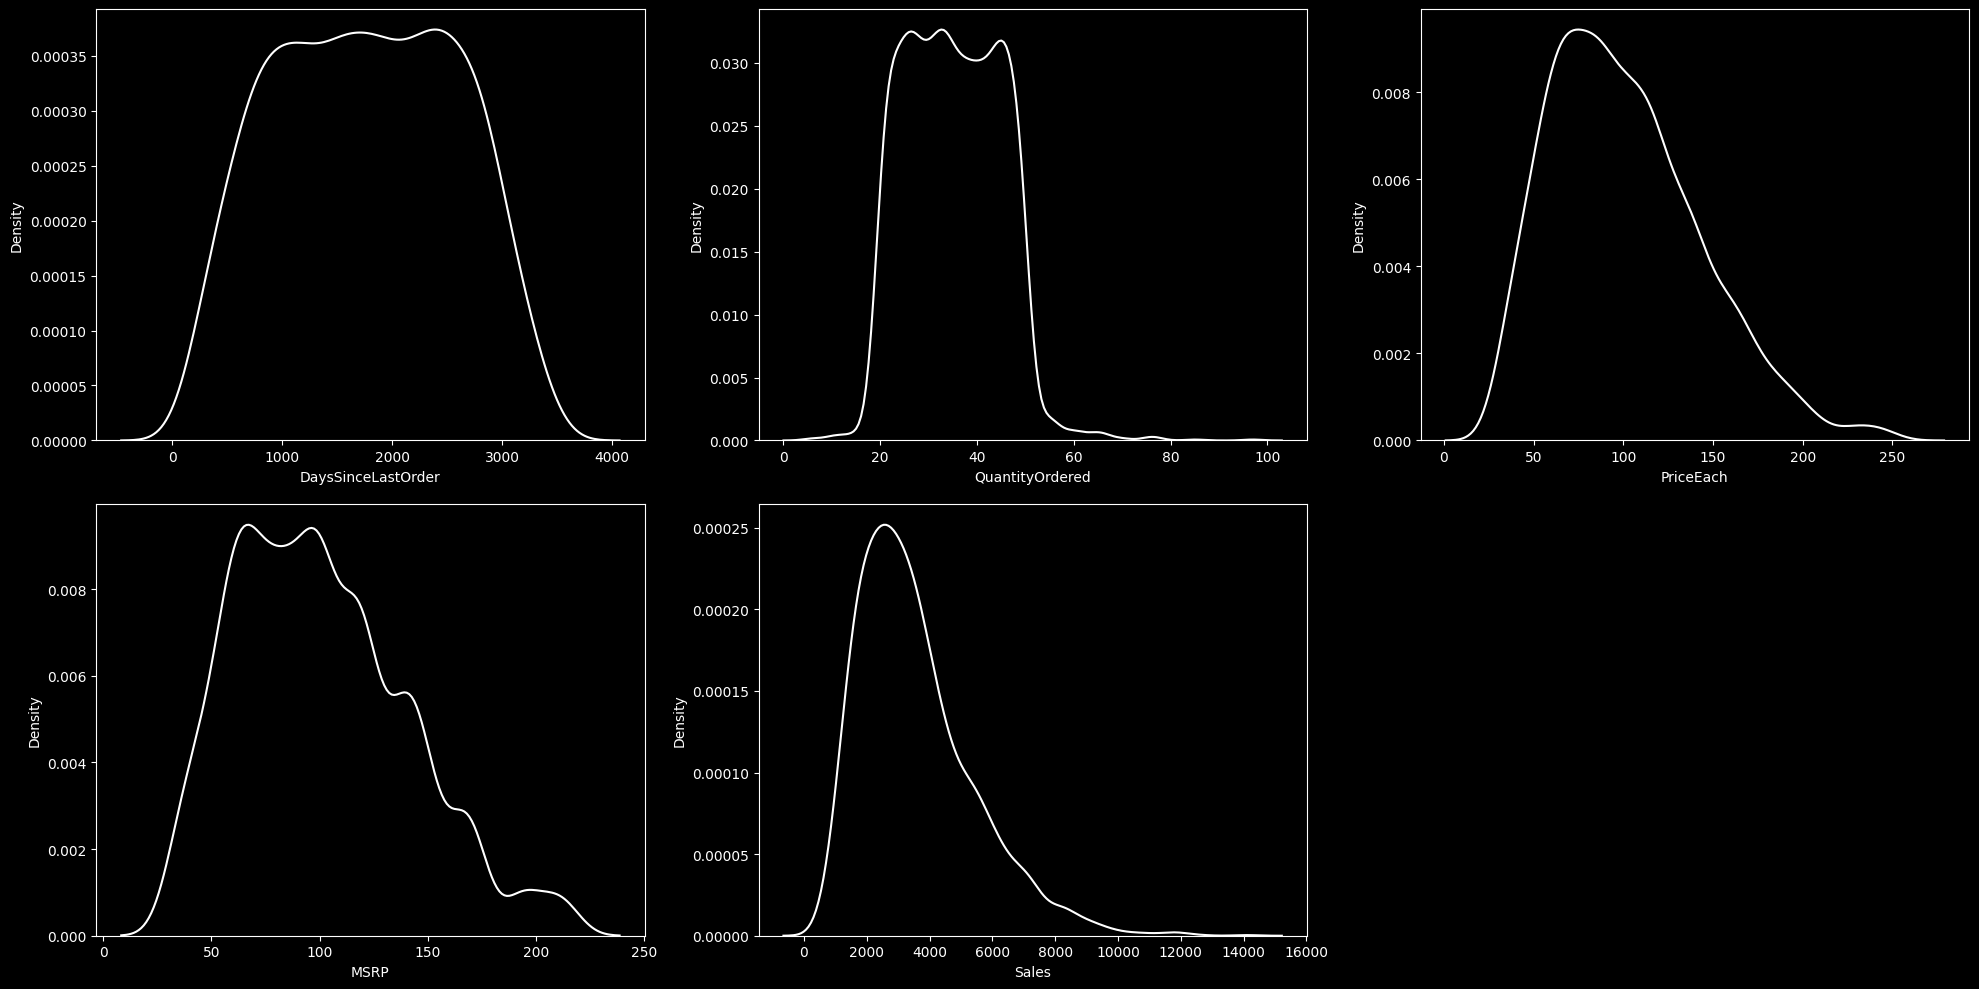

In [512]:
# Let us plot kde plots for Numerical cols and count plots for categorical columns

num_cols=['DaysSinceLastOrder','QuantityOrdered','PriceEach','MSRP','Sales']

plt.style.use('dark_background')
fig,ax=plt.subplots(2,3,figsize=(20,10))
ax=ax.flatten()
i=0
for col in num_cols:
    sns.kdeplot(data=tdf,x=col,ax=ax[i],color='white')
    i+=1
plt.tight_layout()
ax[5].axis('off')
plt.show()

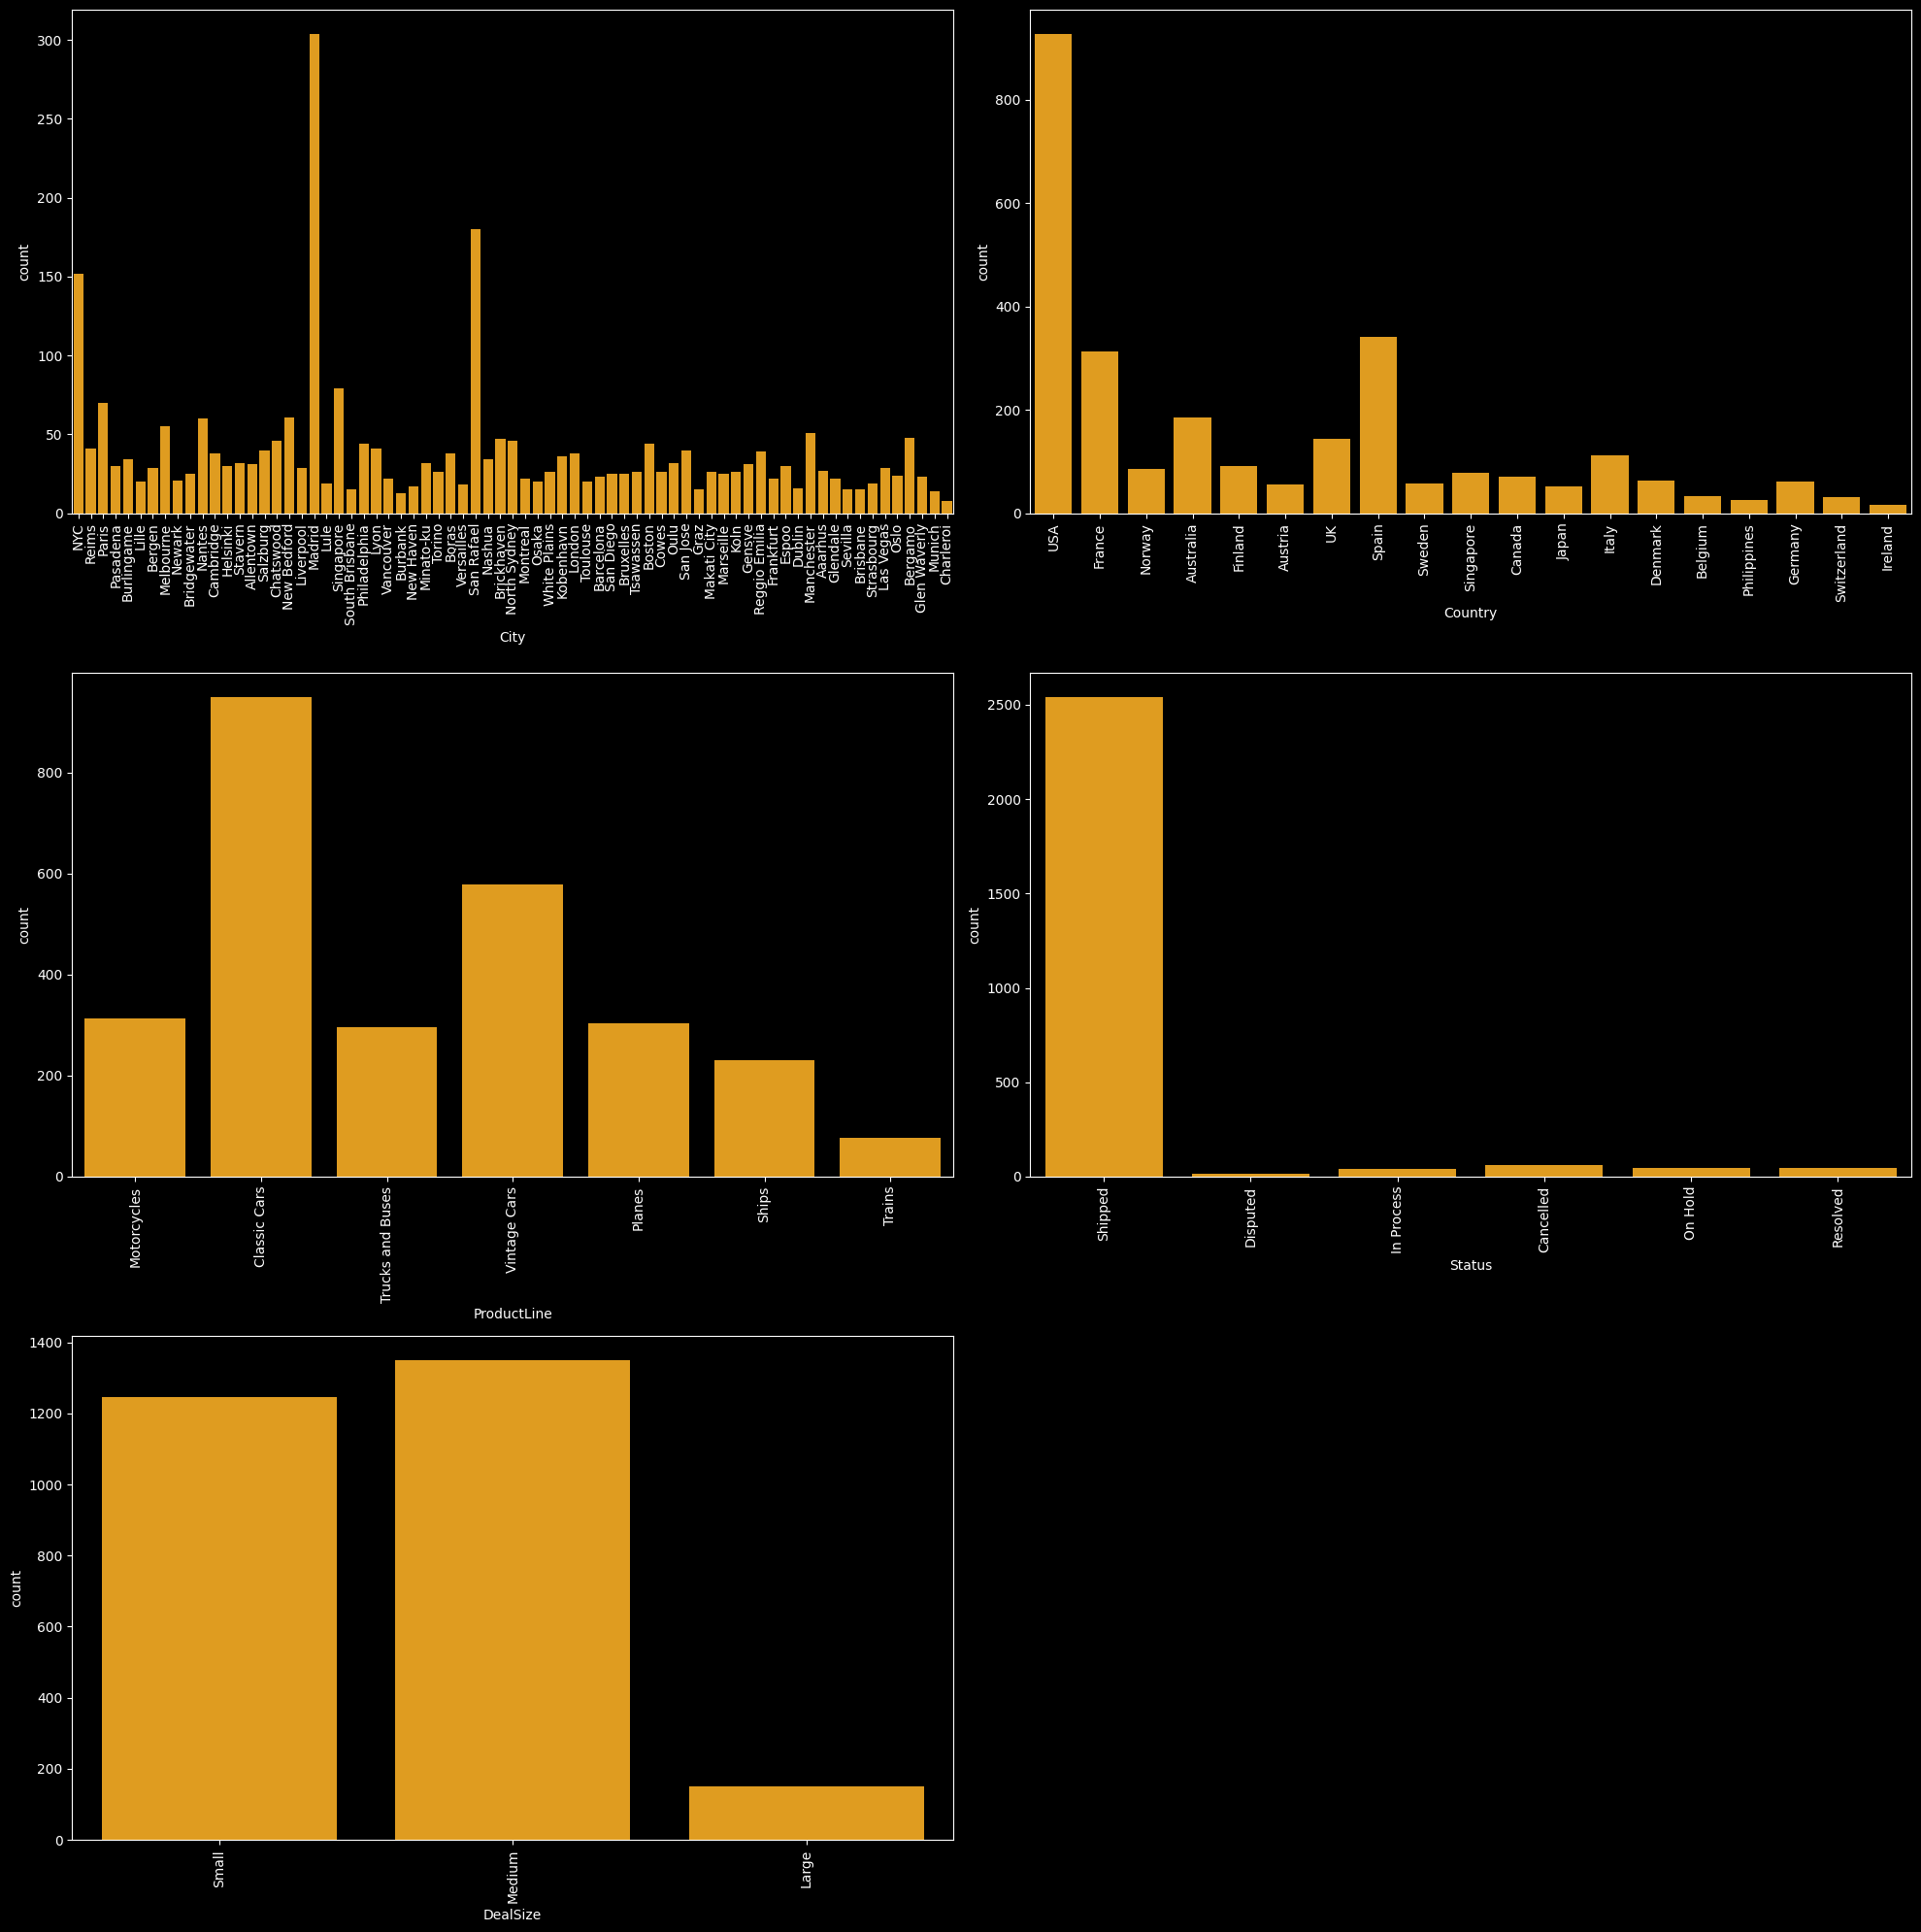

In [513]:
cat_cols=['City','Country','ProductLine','Status','DealSize']
fig,ax=plt.subplots(3,2,figsize=(20,20))
ax=ax.flatten()
i=0
for col in cat_cols:
    sns.countplot(data=tdf,x=col,ax=ax[i],color='orange')
    ax[i].tick_params(axis='x', rotation=90)
    i+=1
plt.tight_layout()
ax[5].axis('off')
plt.show()

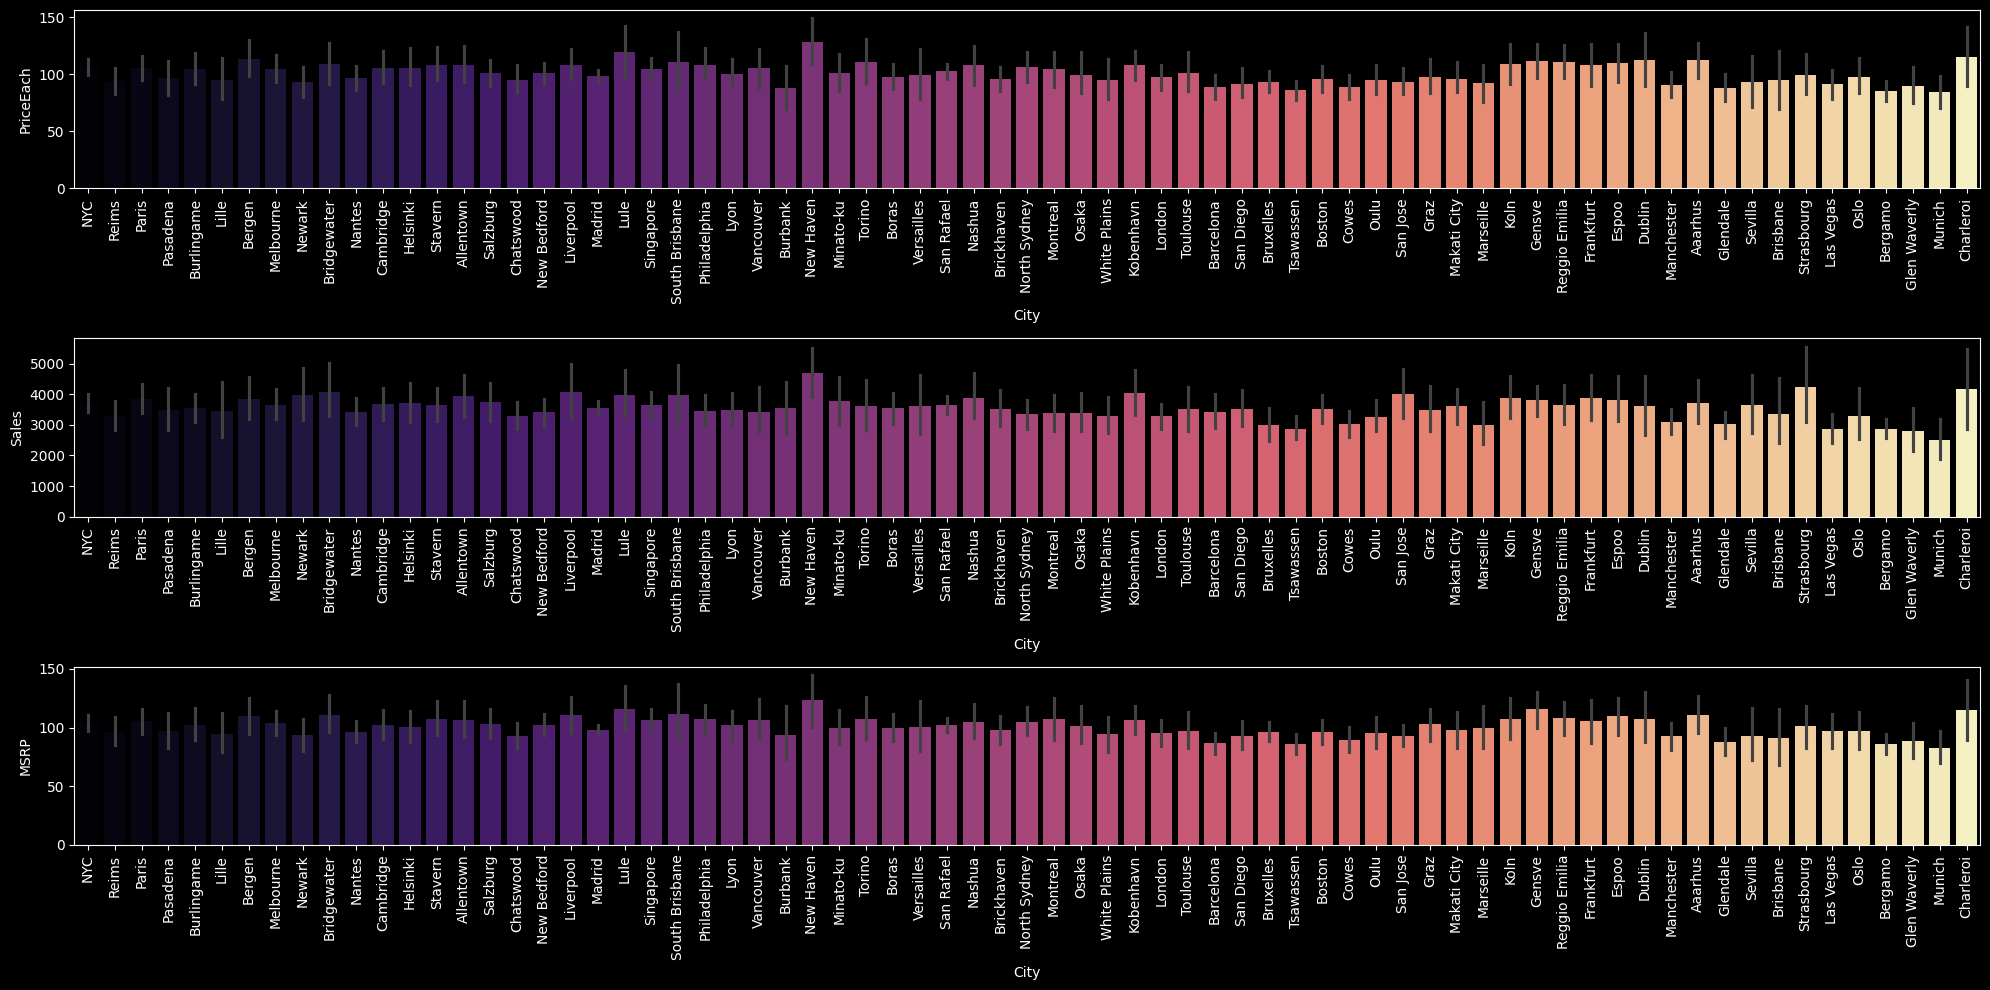

In [514]:
# For each city let us look at the count of orders, avg. prices, avg. msrp,sales etc, furthur more for each city let us look at the status as well as the dealsize

avg_cols=['PriceEach','Sales','MSRP']
fig,ax=plt.subplots(3,1,figsize=(20,10))
ax=ax.flatten()
i=0
for col in avg_cols:
    sns.barplot(data=tdf,x='City',y=col,palette='magma',ax=ax[i],hue='City')
    ax[i].tick_params(axis='x', rotation=90)
    i+=1
plt.tight_layout()
plt.show()

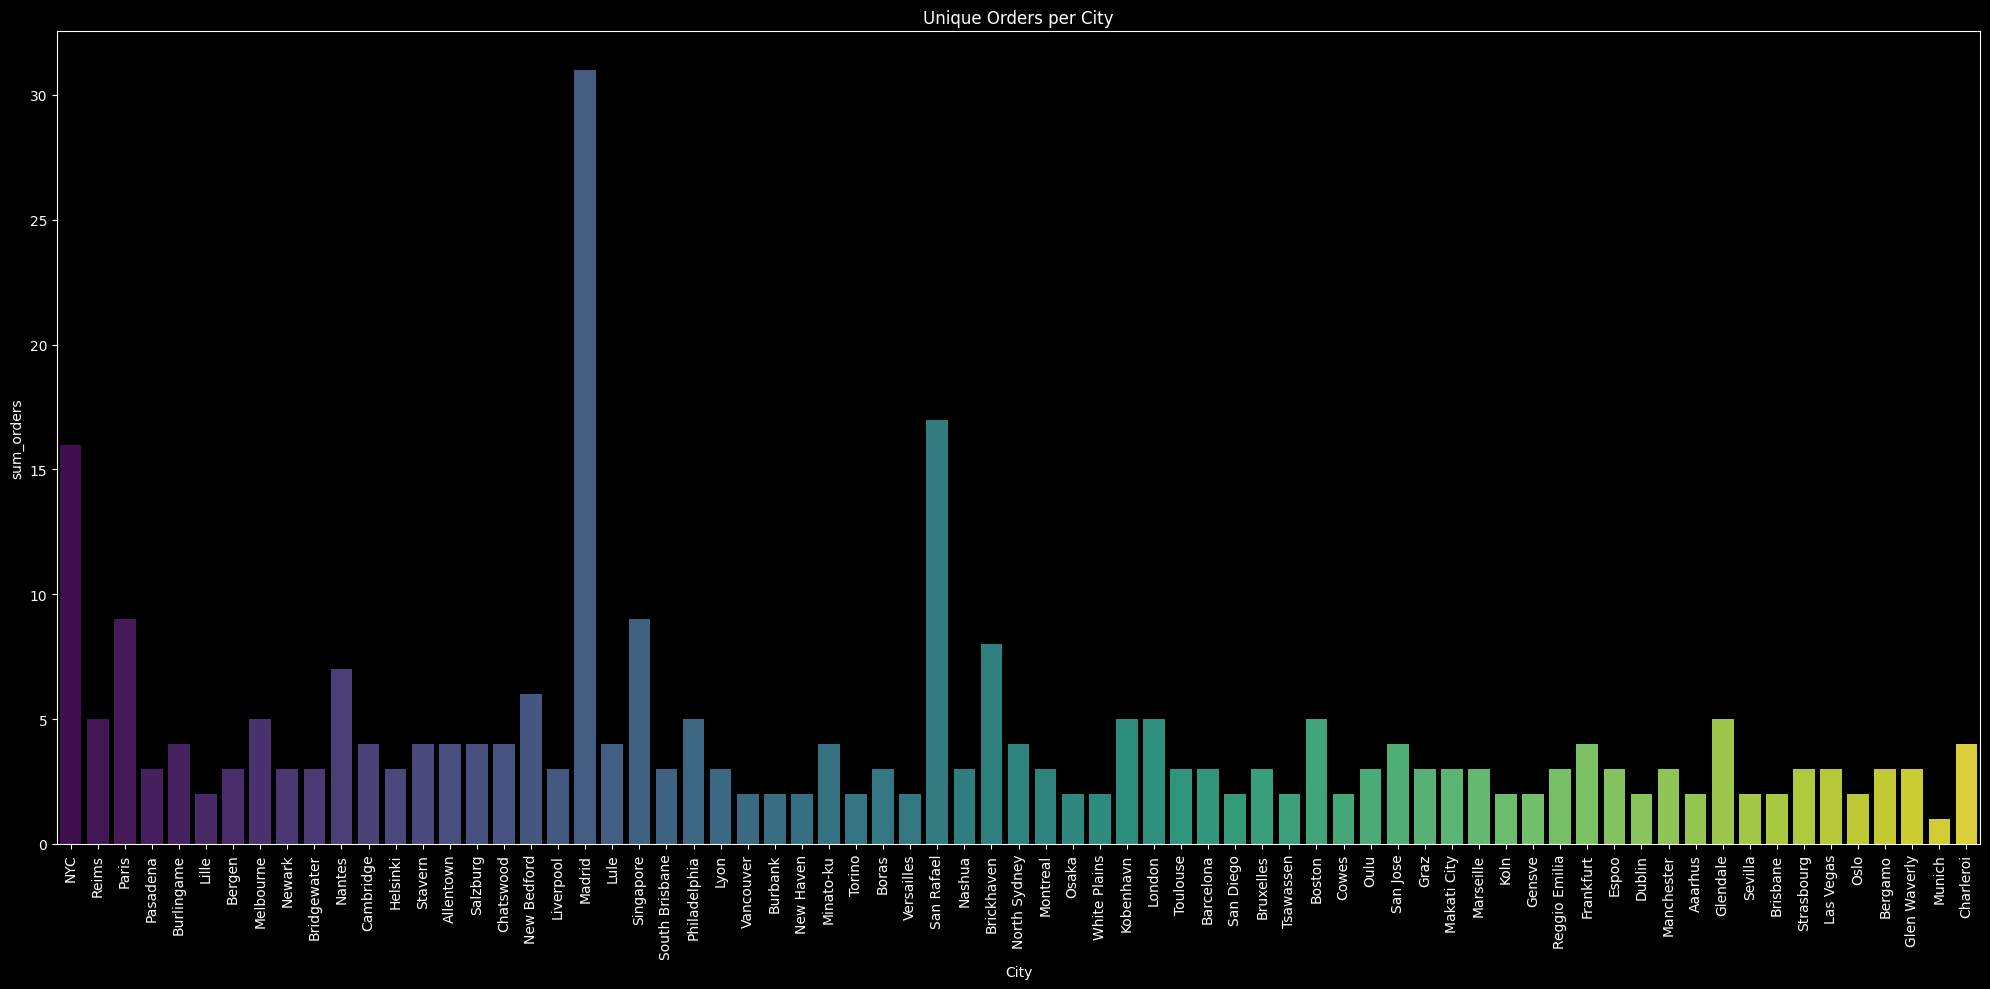

In [515]:
tdf['sum_orders'] = df.groupby('City')['OrderNumber'].transform('nunique')

plt.figure(figsize=(20,10))
sns.barplot(data=tdf.drop_duplicates('City'), x='City', y='sum_orders', palette='viridis',hue='City')
plt.xticks(rotation=90)
plt.title('Unique Orders per City')
plt.tight_layout()
plt.show()

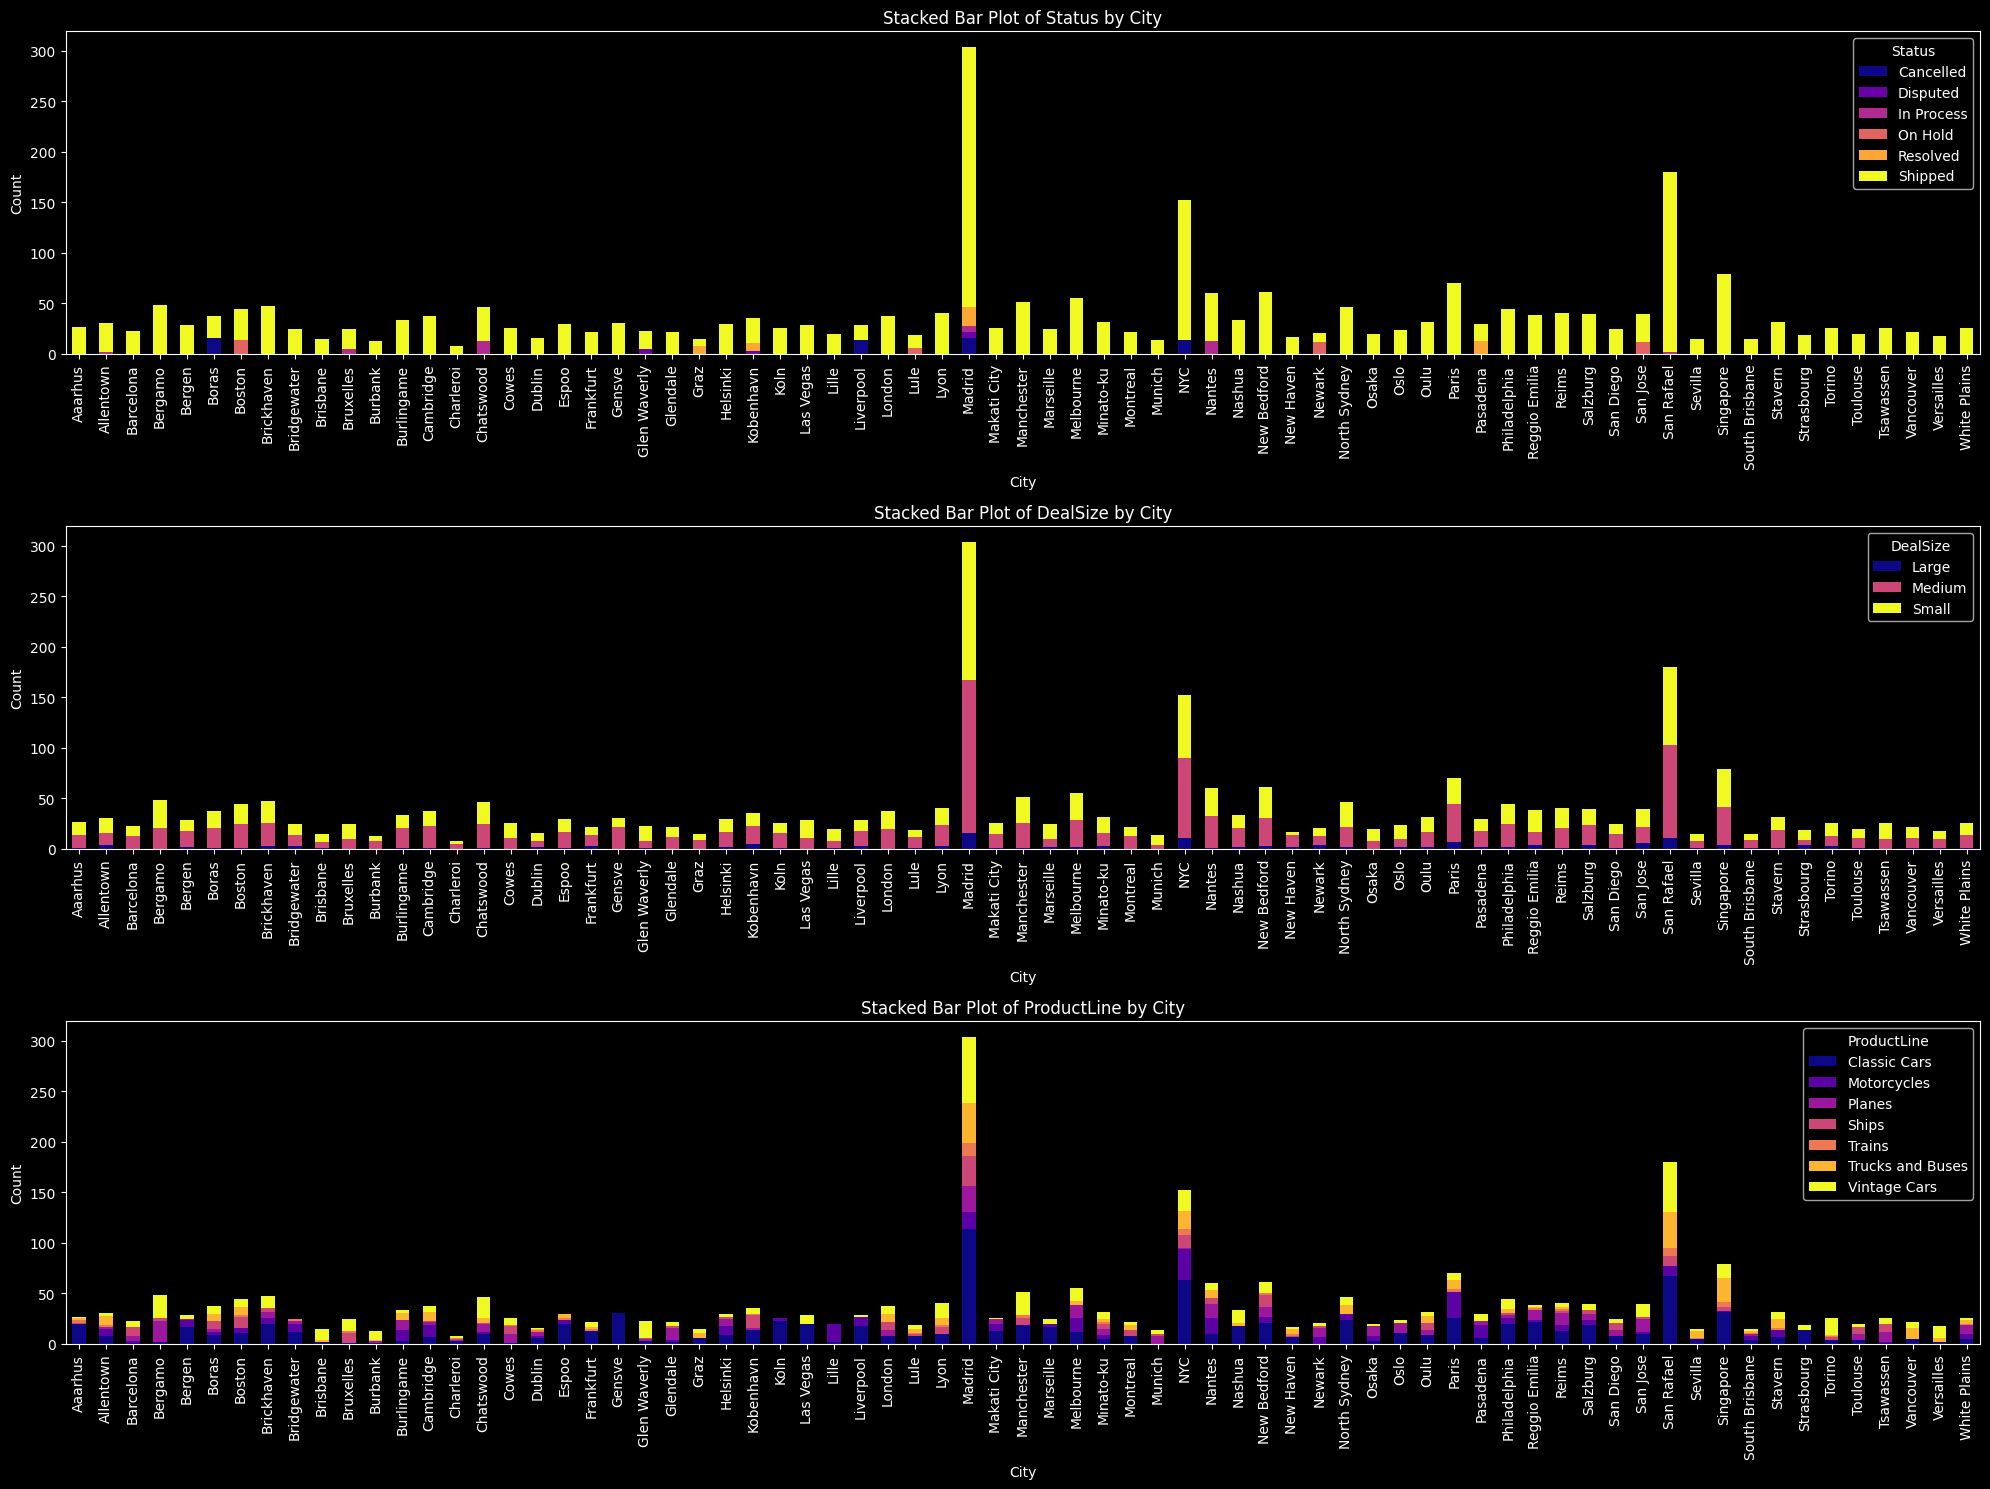

In [516]:
fig,ax=plt.subplots(3,1,figsize=(20,15))
cols=['Status','DealSize','ProductLine']
for i, col in enumerate(cols):
    pivot_df = df.groupby(['City', col]).size().unstack(fill_value=0)
    pivot_df.plot(kind='bar', stacked=True, ax=ax[i], colormap='plasma')
    ax[i].set_title(f'Stacked Bar Plot of {col} by City')
    ax[i].set_xlabel('City')
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

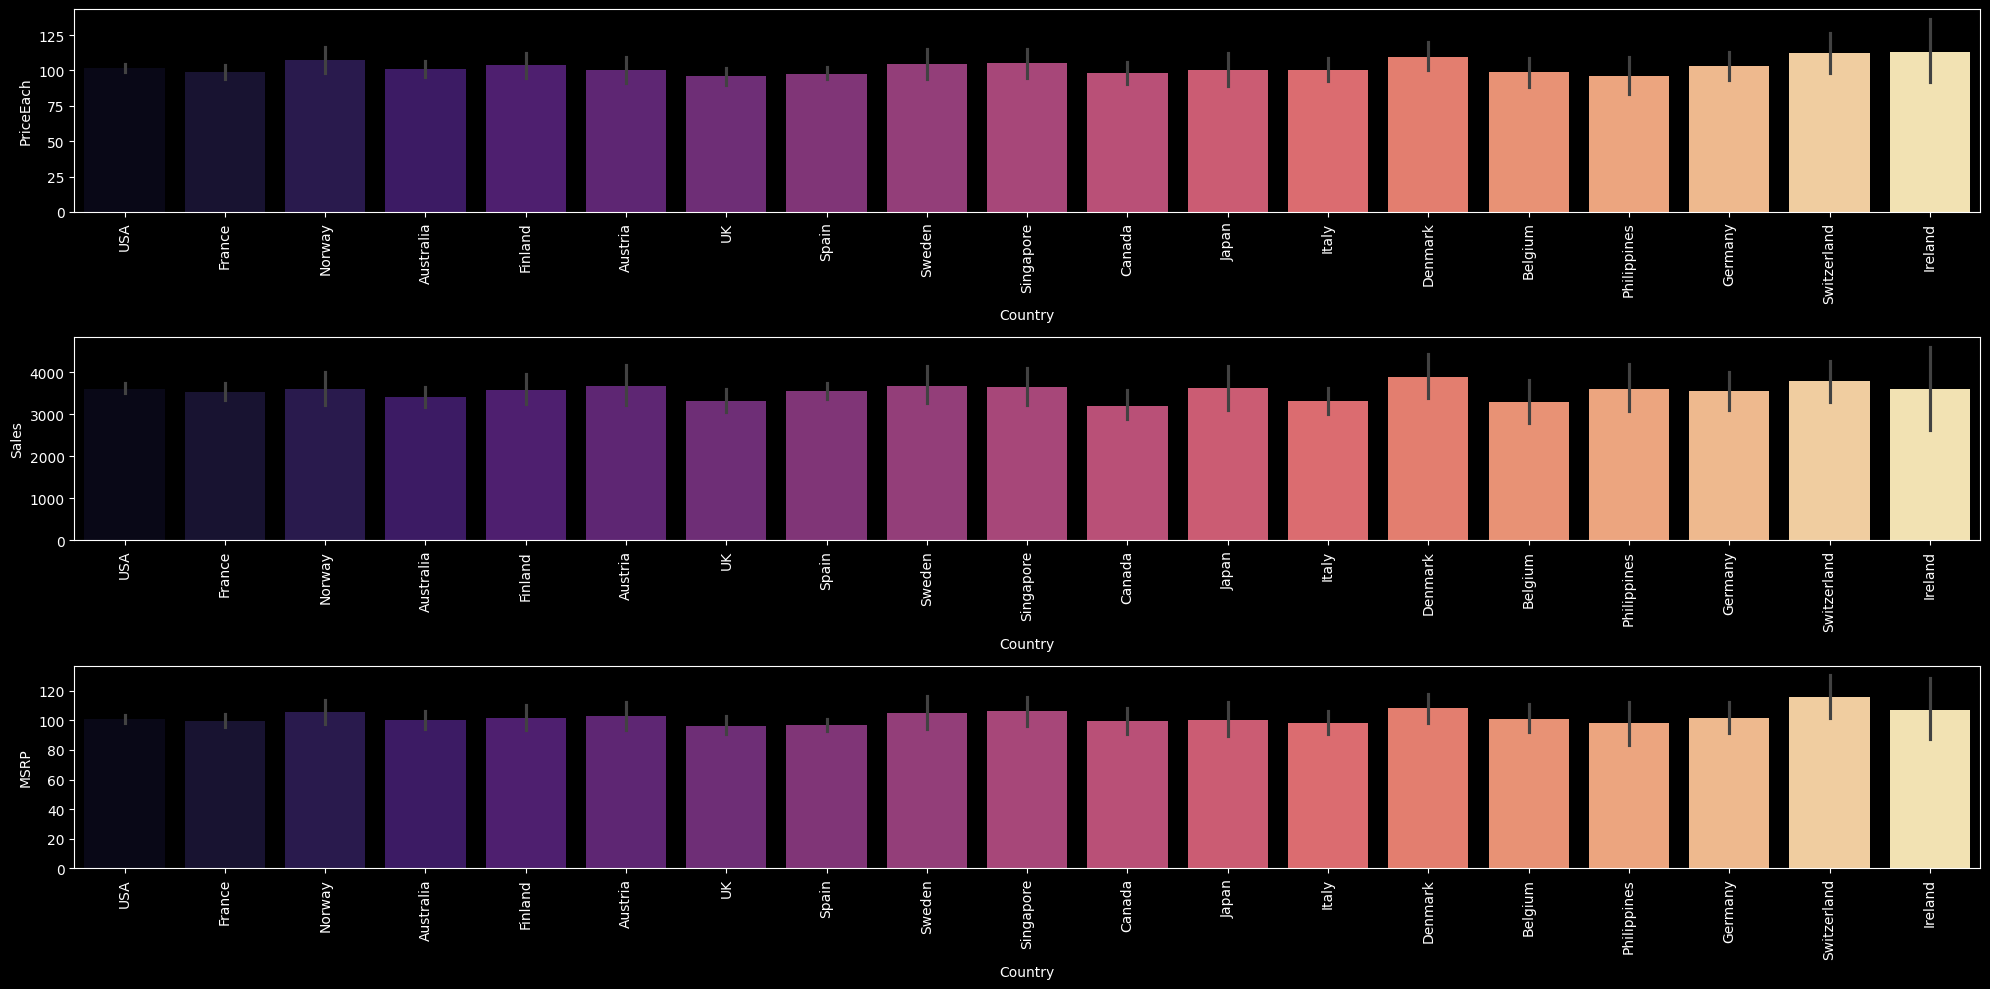

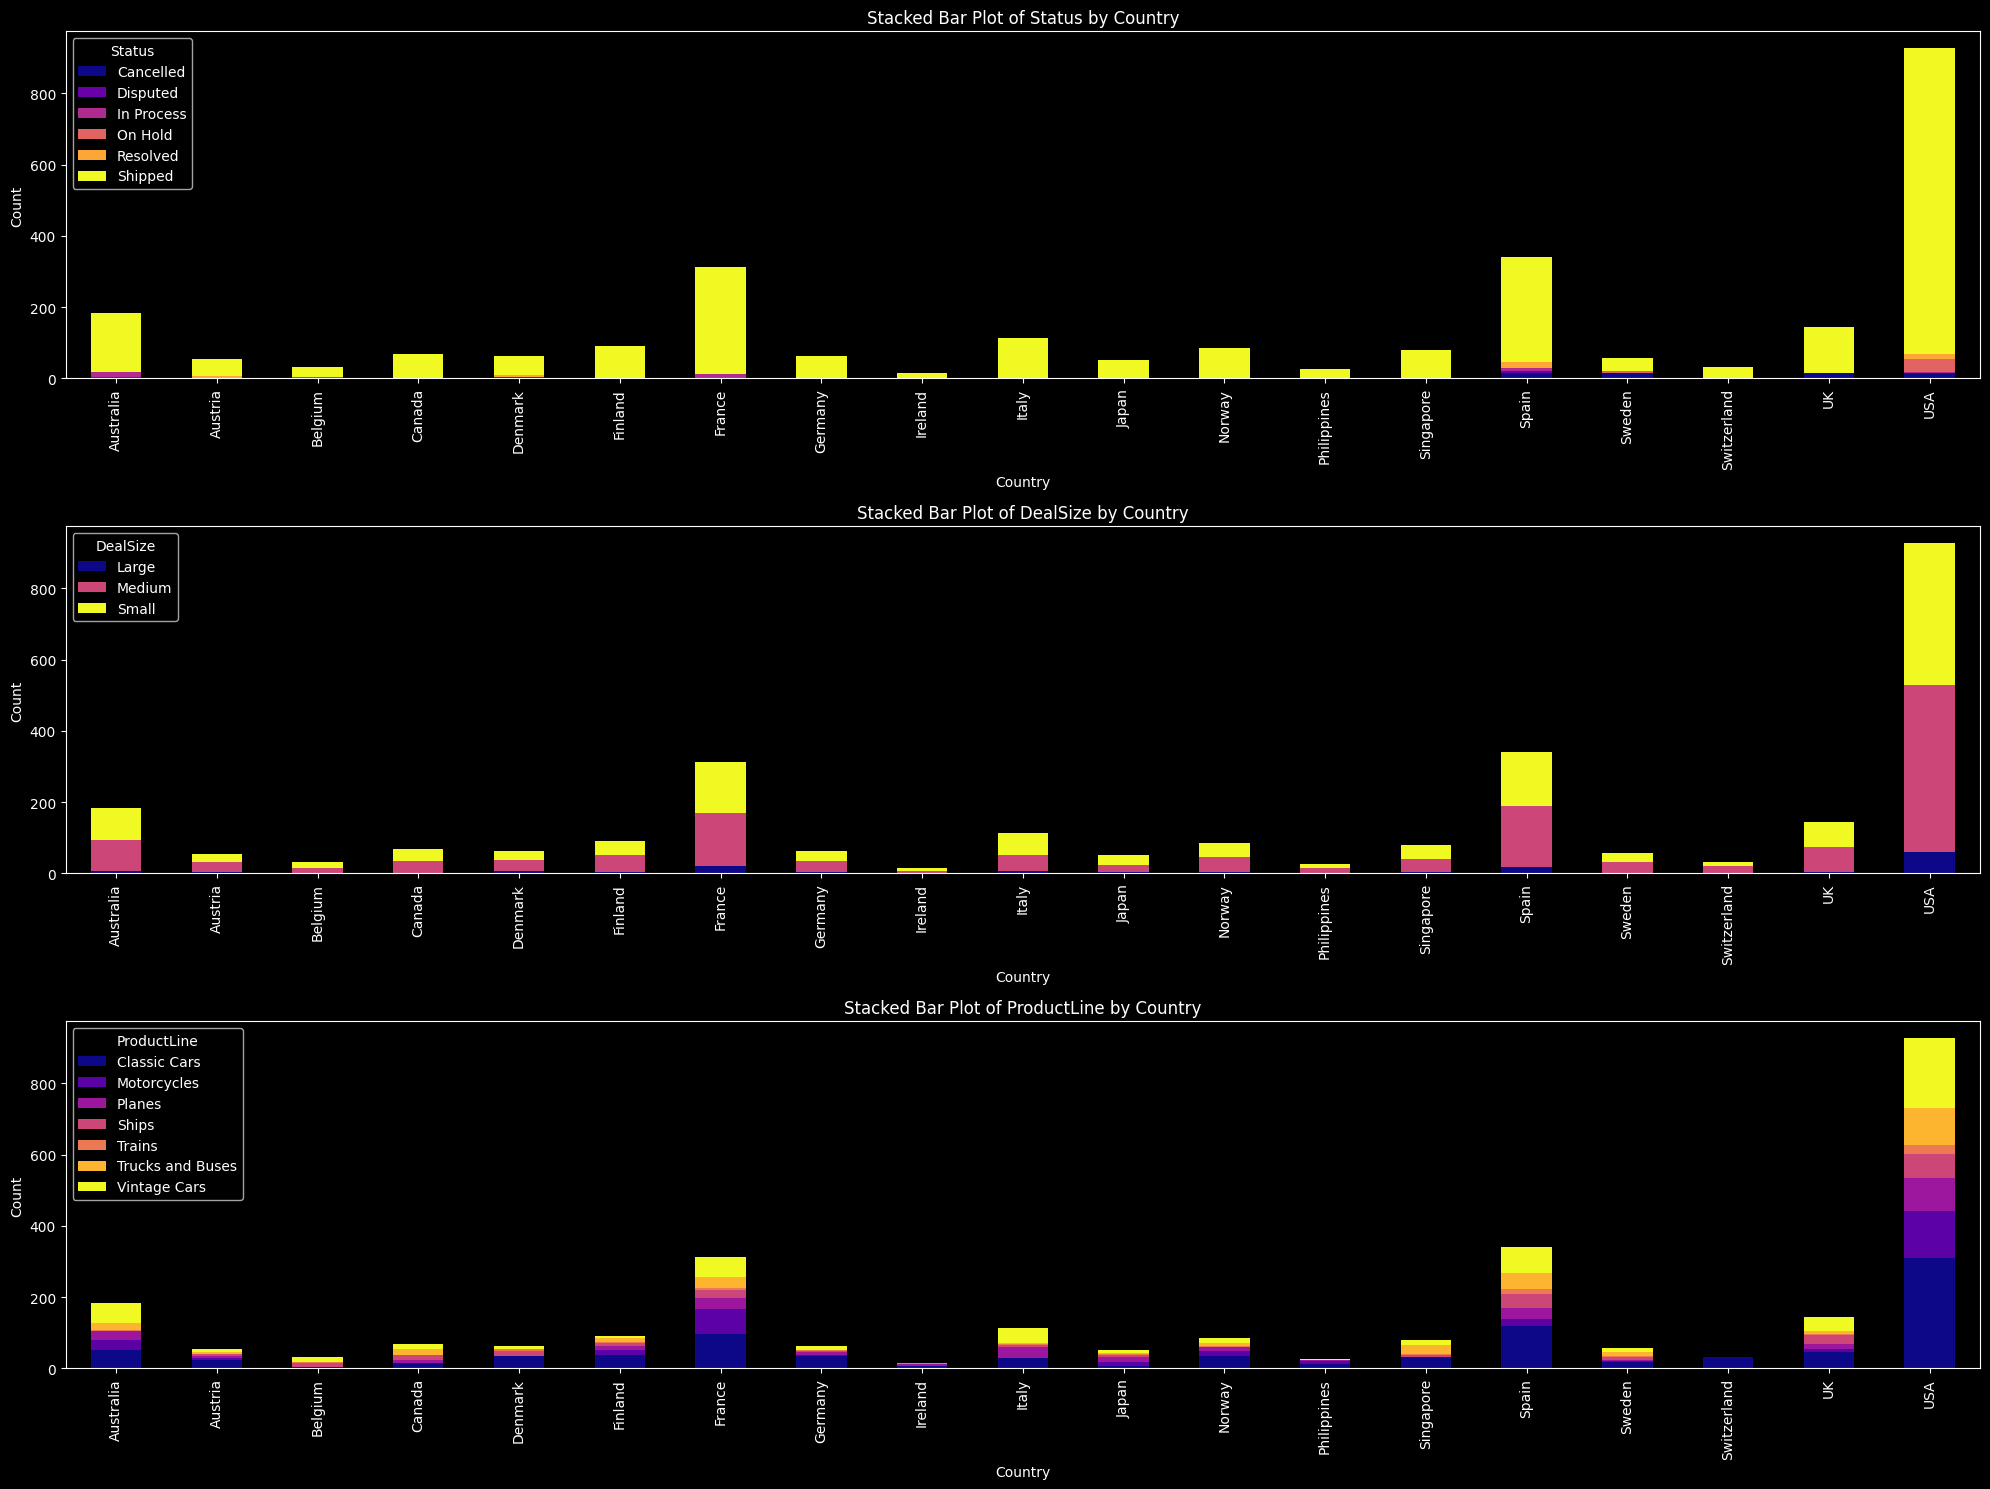

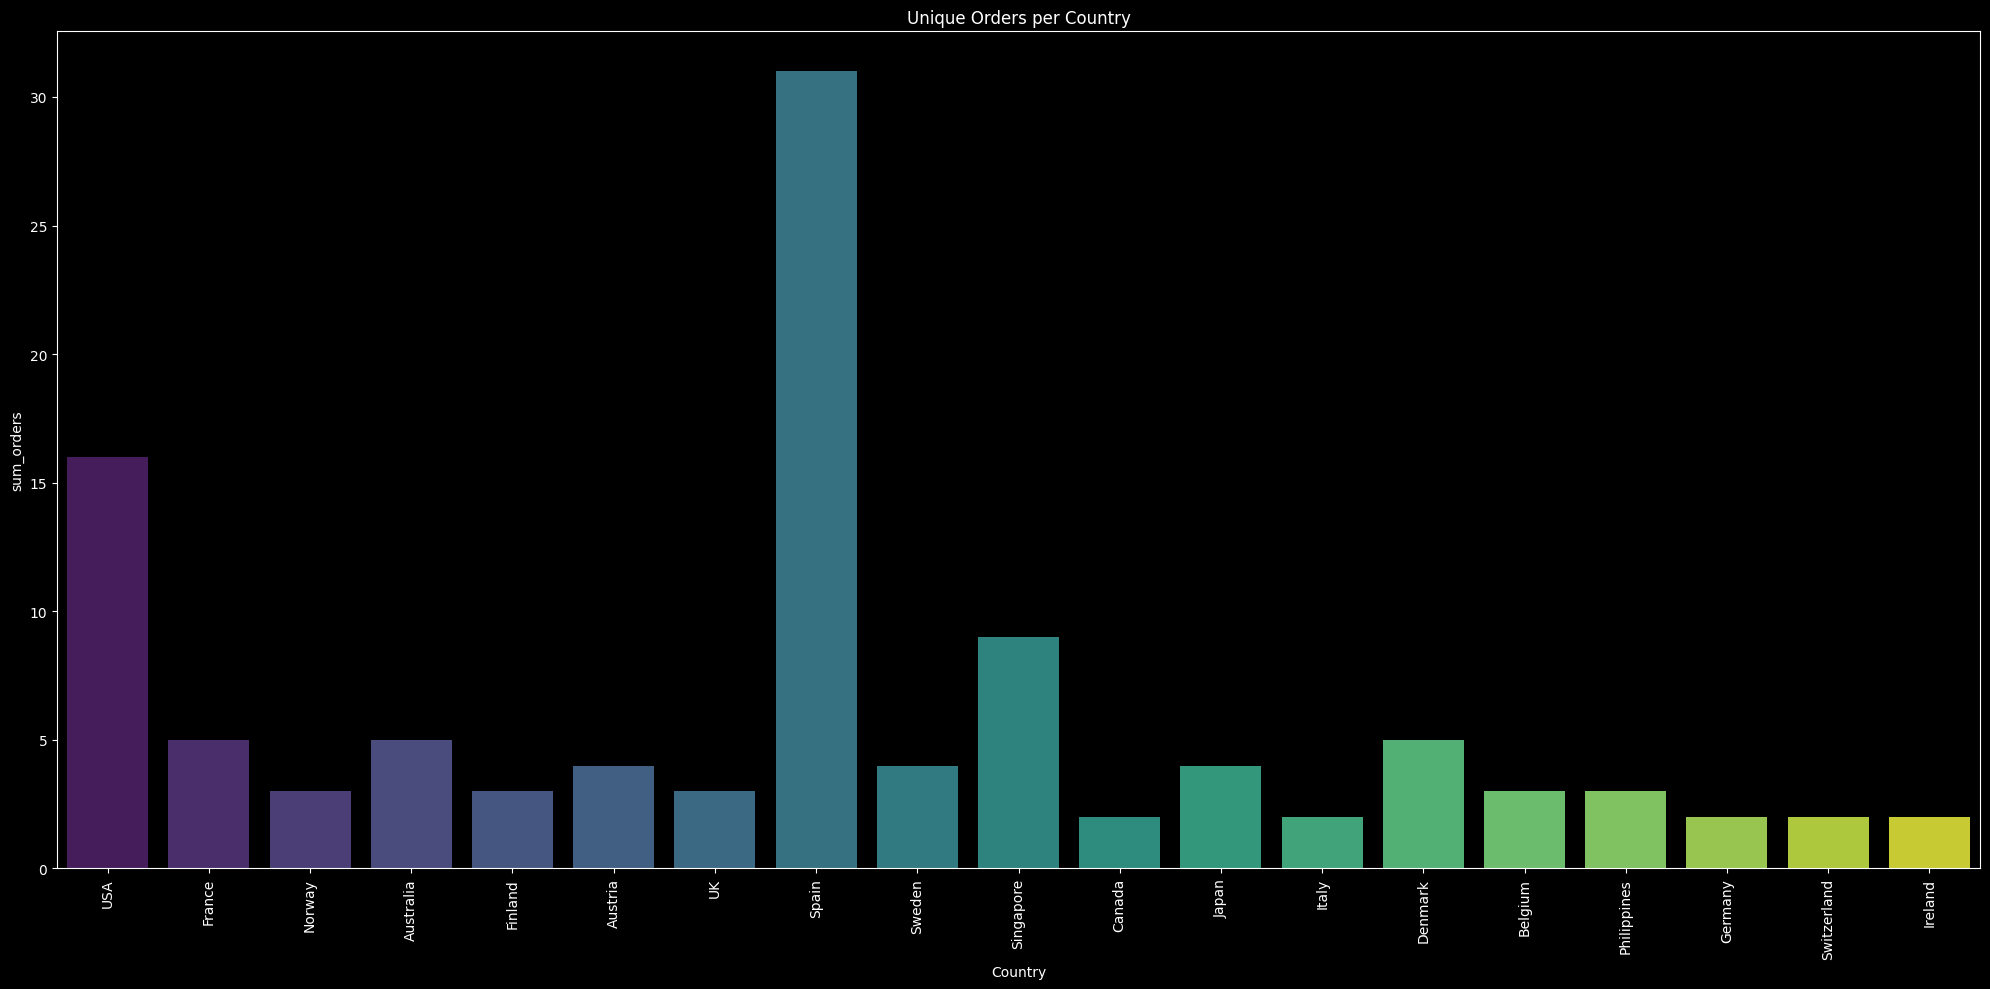

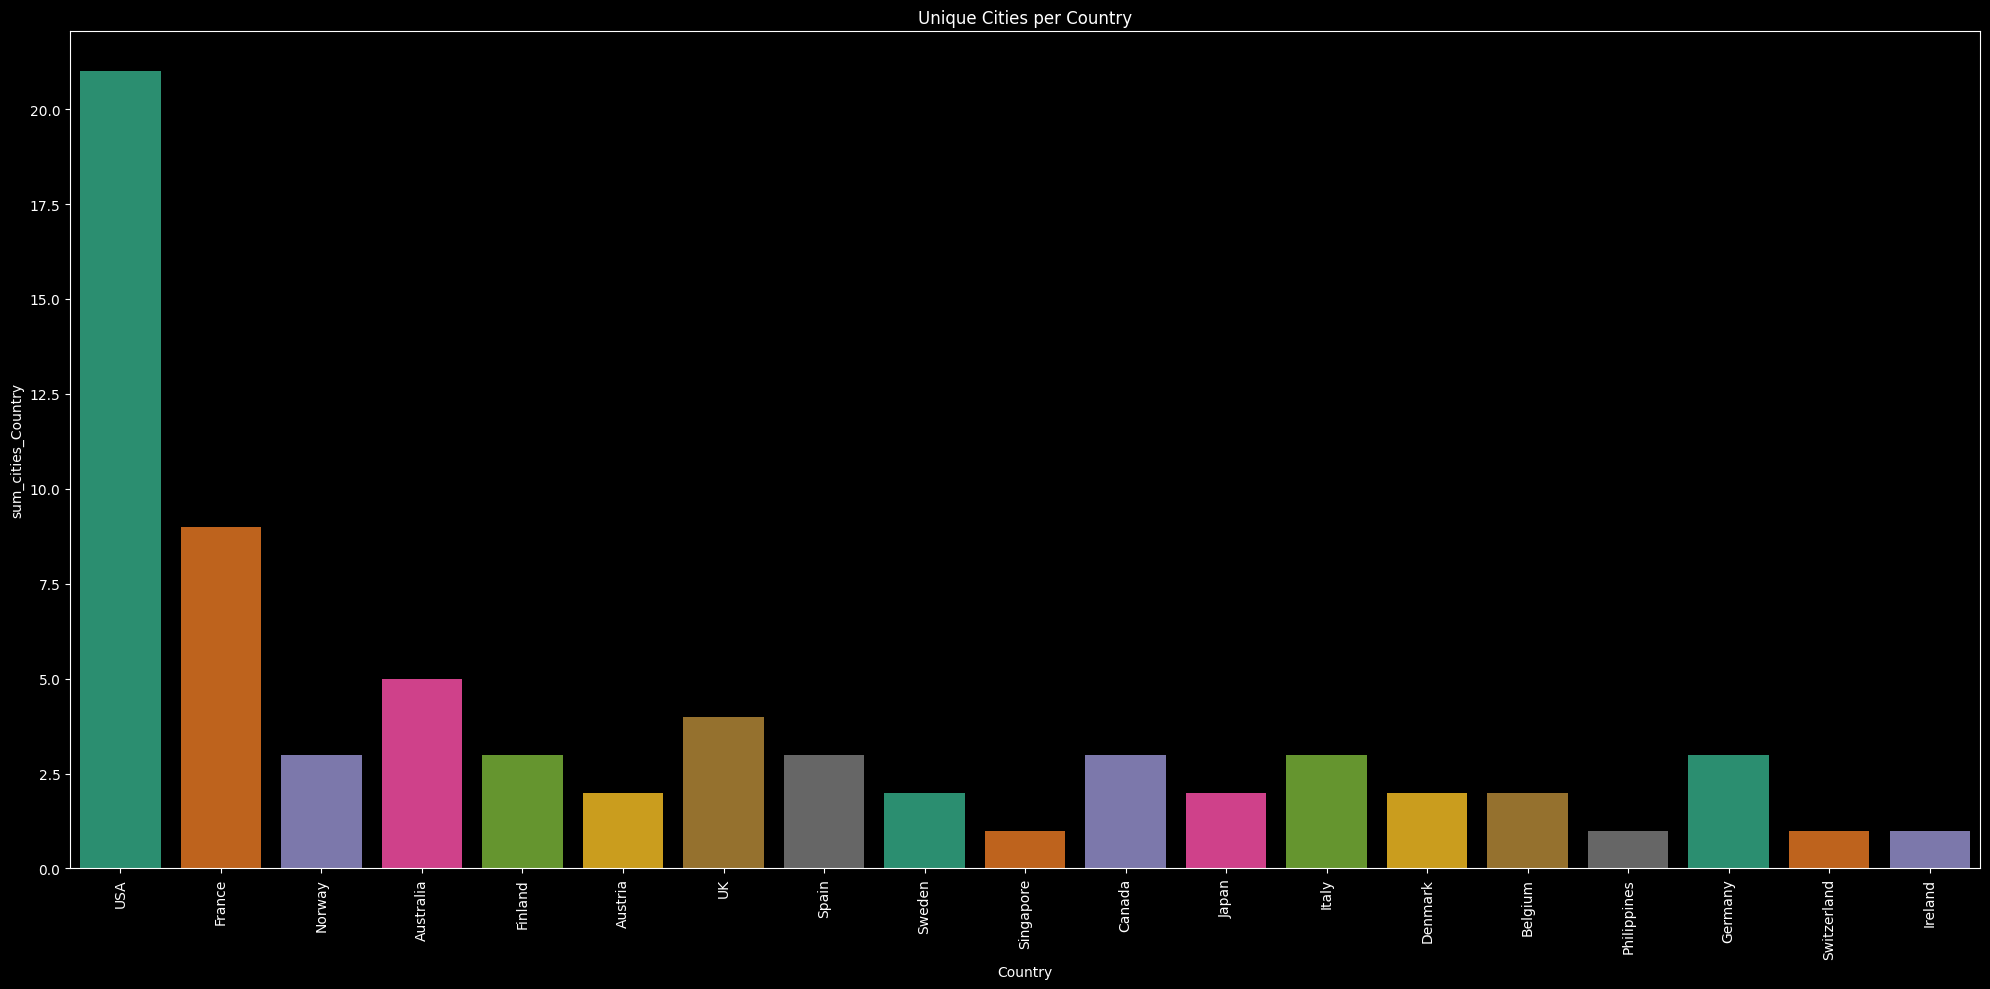

In [517]:
# For each country let us look at the count of orders, avg. prices, avg. msrp,sales etc, furthur more for each city let us look at the status as well as the dealsize
avg_cols=['PriceEach','Sales','MSRP']
fig,ax=plt.subplots(3,1,figsize=(20,10))
ax=ax.flatten()
i=0
for col in avg_cols:
    sns.barplot(data=tdf,x='Country',y=col,palette='magma',ax=ax[i],hue='Country')
    ax[i].tick_params(axis='x', rotation=90)
    i+=1
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(3,1,figsize=(20,15))
cols=['Status','DealSize','ProductLine']
for i, col in enumerate(cols):
    pivot_df = df.groupby(['Country', col]).size().unstack(fill_value=0)
    pivot_df.plot(kind='bar', stacked=True, ax=ax[i], colormap='plasma')
    ax[i].set_title(f'Stacked Bar Plot of {col} by Country')
    ax[i].set_xlabel('Country')
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

tdf['sum_orders_Country'] = df.groupby('Country')['OrderNumber'].transform('nunique')

plt.figure(figsize=(20,10))
sns.barplot(data=tdf.drop_duplicates('Country'), x='Country', y='sum_orders', palette='viridis',hue='Country')
plt.xticks(rotation=90)
plt.title('Unique Orders per Country')
plt.tight_layout()
plt.show()

tdf['sum_cities_Country'] = df.groupby('Country')['City'].transform('nunique')

plt.figure(figsize=(20,10))
sns.barplot(data=tdf.drop_duplicates('Country'), x='Country', y='sum_cities_Country', palette='Dark2',hue='Country')
plt.xticks(rotation=90)
plt.title('Unique Cities per Country')
plt.tight_layout()
plt.show()

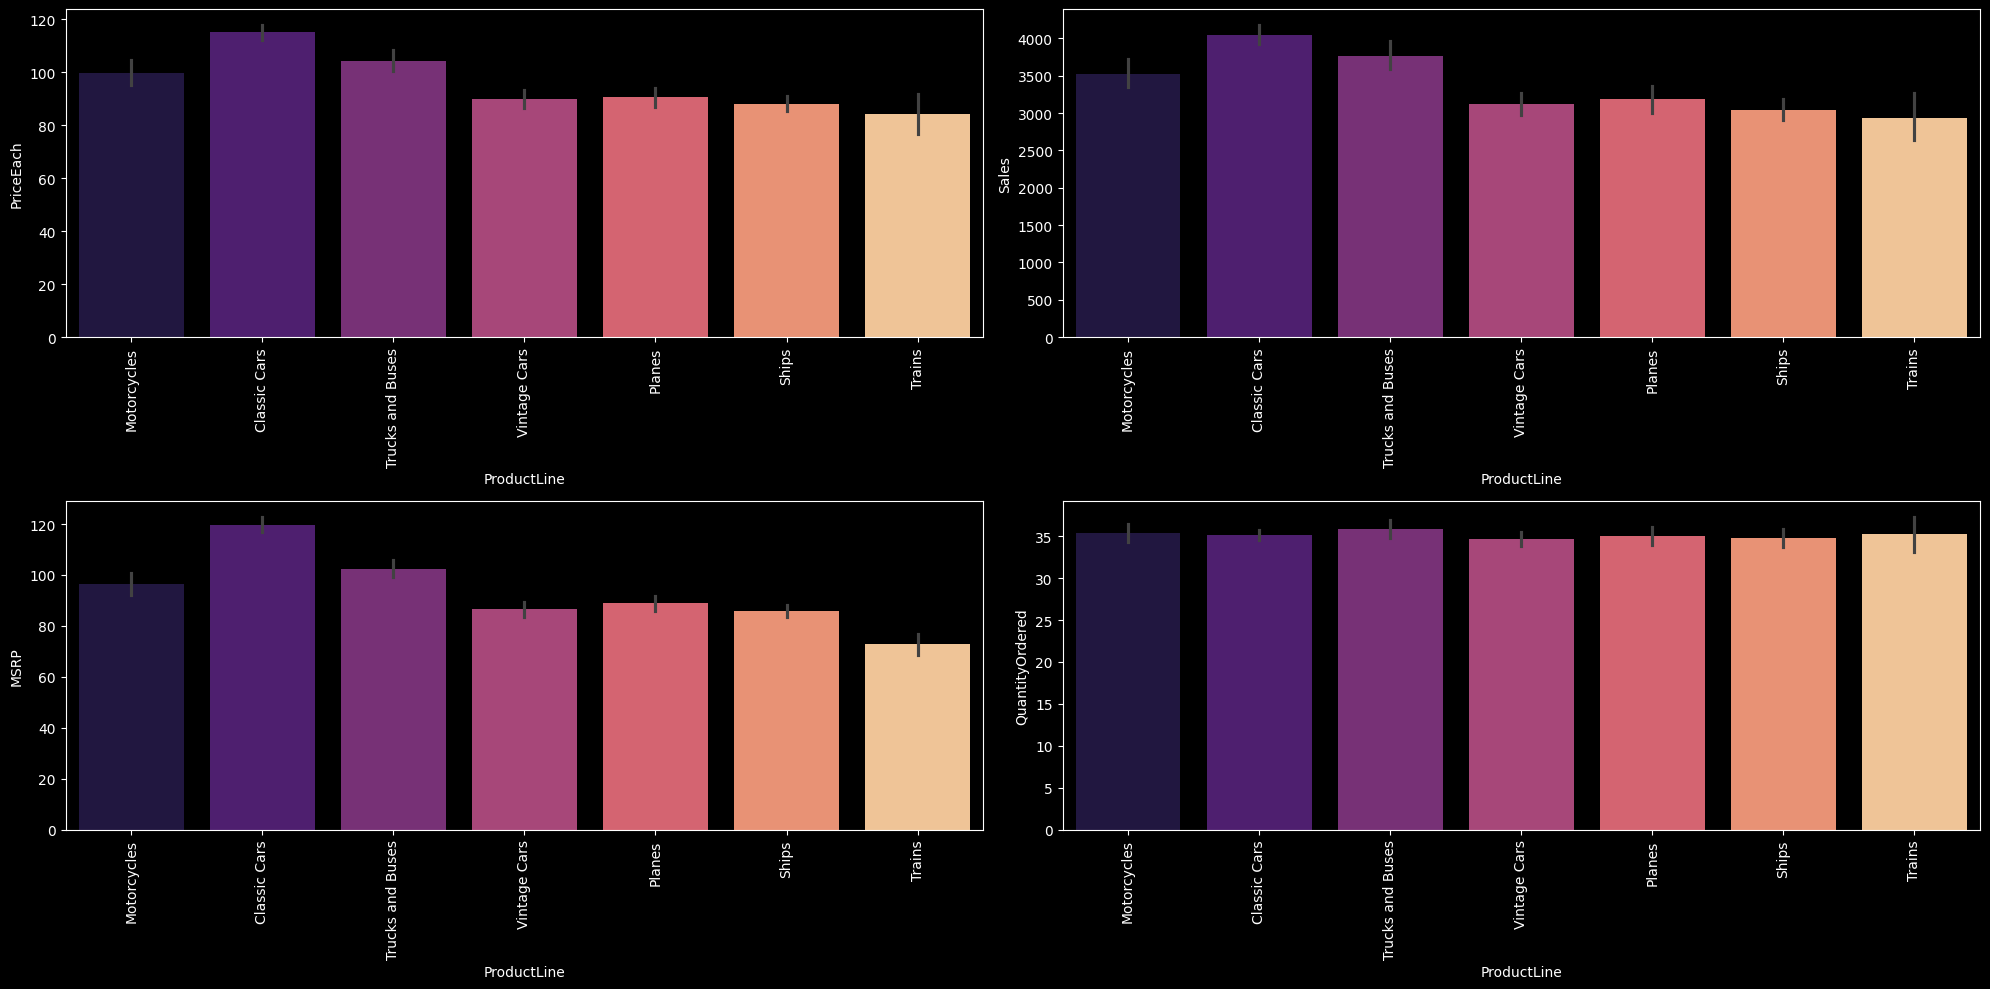

In [518]:
# Let us look into Product Lines
# Avg. Sales,PriceEach,MSRP,QuantityOrdered
# Status check for each Product Line 
# Deal Size for each product line 
# Count of orders for each kind of Product Line

avg_cols=['PriceEach','Sales','MSRP','QuantityOrdered']
fig,ax=plt.subplots(2,2,figsize=(20,10))
ax=ax.flatten()
i=0
for col in avg_cols:
    sns.barplot(data=tdf,x='ProductLine',y=col,palette='magma',ax=ax[i],hue='ProductLine')
    ax[i].tick_params(axis='x', rotation=90)
    i+=1
plt.tight_layout()
plt.show()

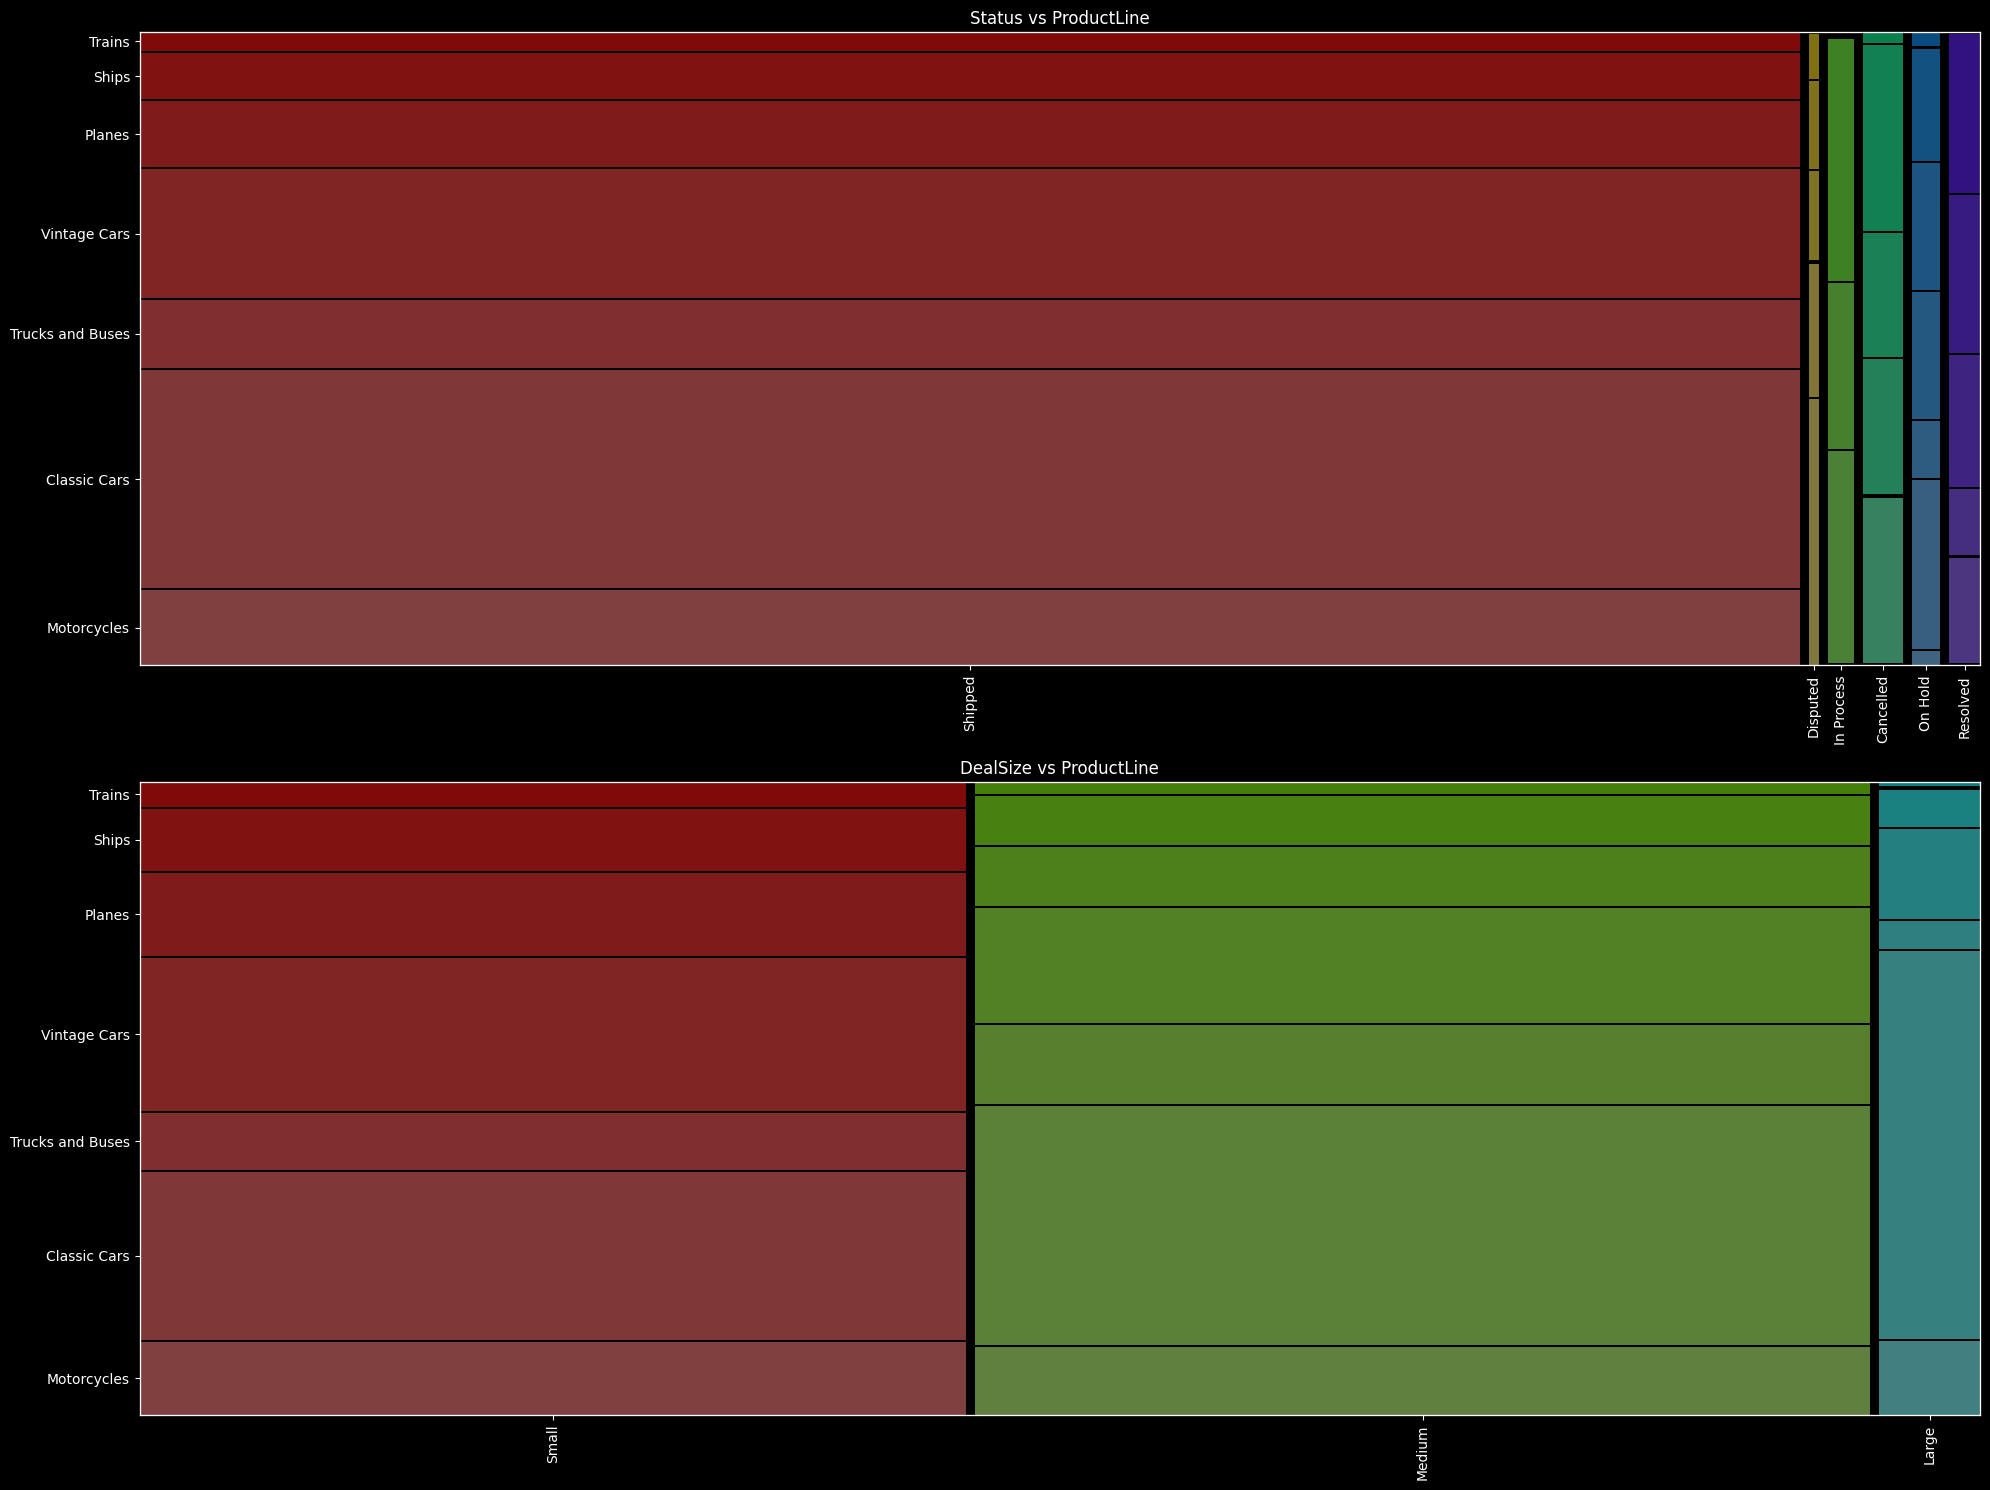

In [519]:
cols = [('Status', 'ProductLine'), ('DealSize', 'ProductLine')]
fig, ax = plt.subplots(2, 1, figsize=(20, 15))

for i, (col1, col2) in enumerate(cols):
    mosaic(tdf, [col1, col2], ax=ax[i], title=f'{col1} vs {col2}')
    for label in ax[i].texts:
        label.set_visible(False)
    ax[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

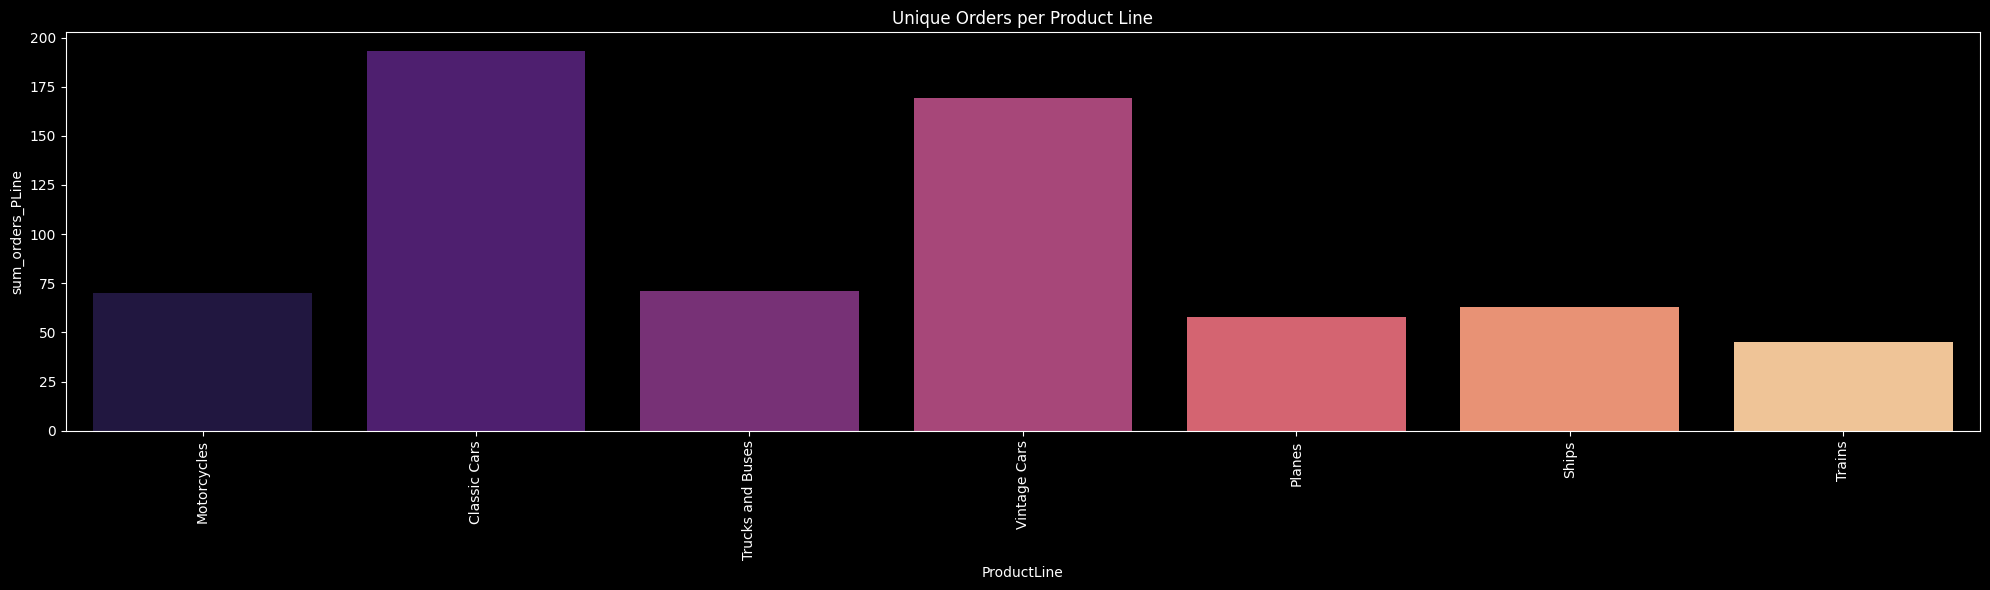

In [520]:
tdf['sum_orders_PLine'] = df.groupby('ProductLine')['OrderNumber'].transform('nunique')

plt.figure(figsize=(20,6))
sns.barplot(data=tdf.drop_duplicates('ProductLine'), x='ProductLine', y='sum_orders_PLine', palette='magma',hue='ProductLine')
plt.xticks(rotation=90)
plt.title('Unique Orders per Product Line')
plt.tight_layout()
plt.show()

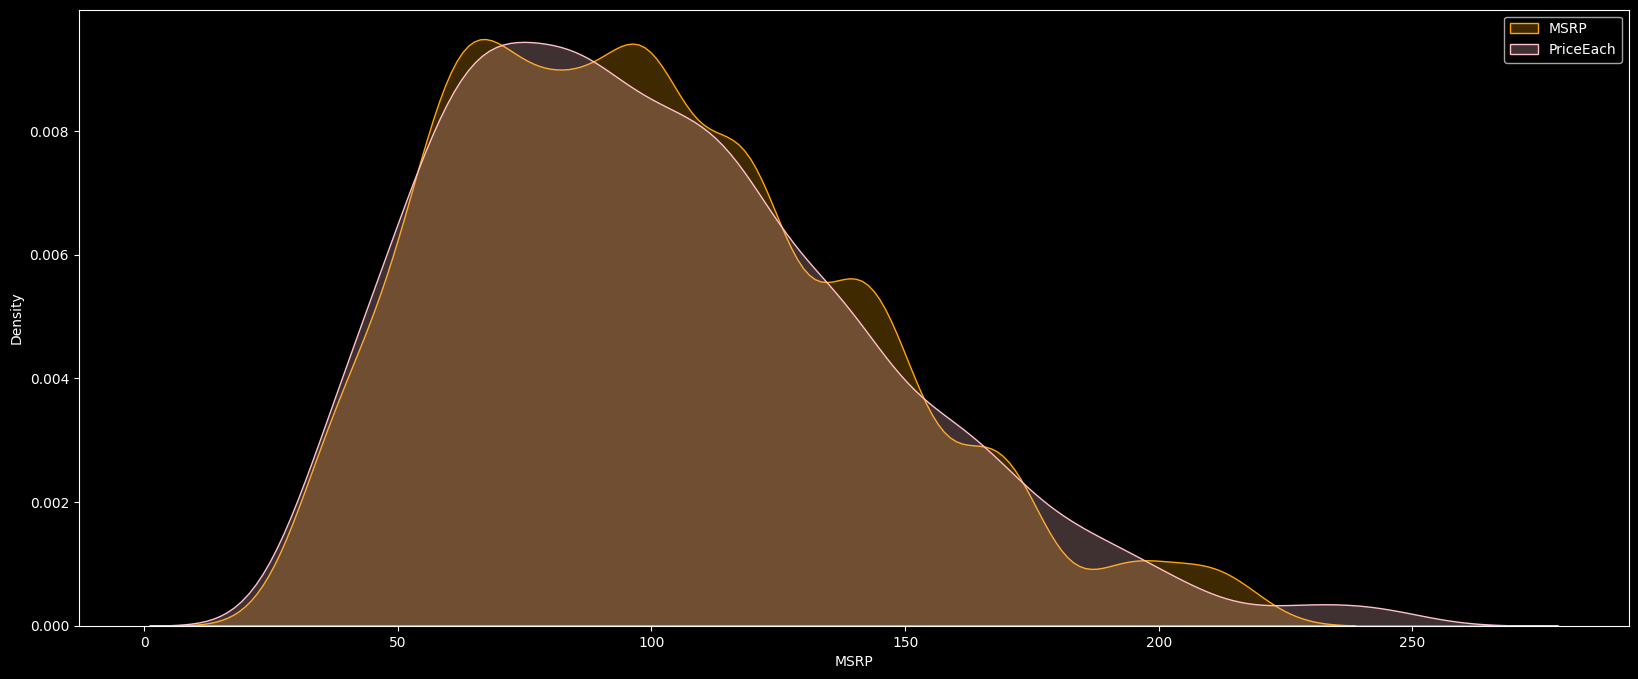

In [521]:
# Let us visualize the relationship between PriceEach and MSRP
plt.figure(figsize=(20,8))
sns.kdeplot(data=tdf, x='MSRP',color='orange', fill=True)
sns.kdeplot(data=tdf, x='PriceEach',color='pink', fill=True)
plt.legend(['MSRP','PriceEach'])
plt.show()

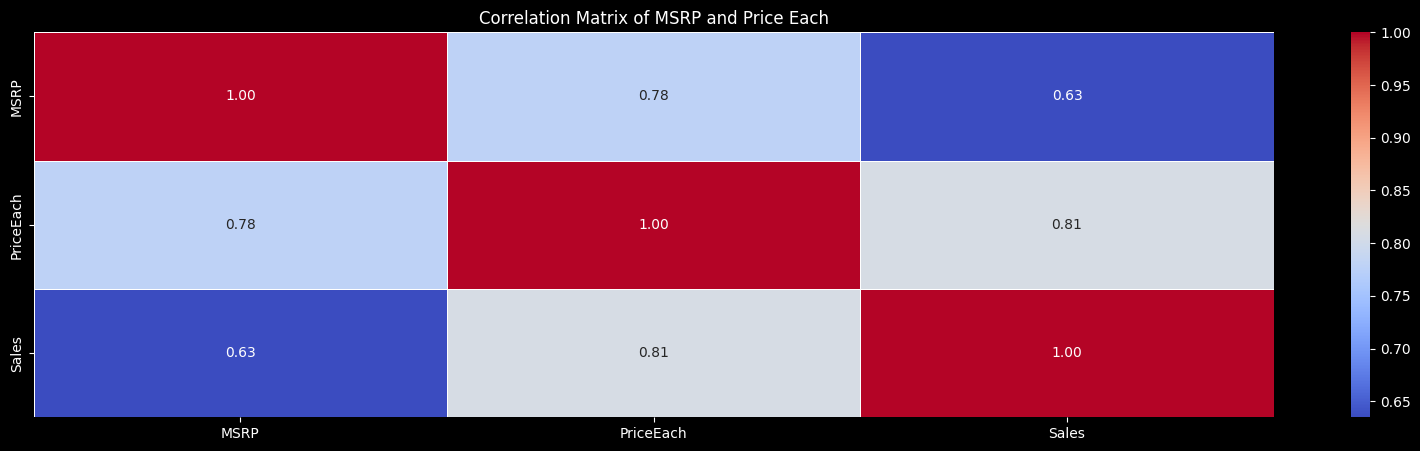

In [522]:
correlation_data = tdf[['MSRP', 'PriceEach','Sales']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20, 5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of MSRP and Price Each')
plt.show()

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderNumber         2747 non-null   int64         
 1   CustomerName        2747 non-null   object        
 2   FullName            2747 non-null   object        
 3   Phone               2747 non-null   object        
 4   City                2747 non-null   object        
 5   Country             2747 non-null   object        
 6   PostalCode          2747 non-null   object        
 7   DaysSinceLastOrder  2747 non-null   int64         
 8   OrderDate           2747 non-null   datetime64[ns]
 9   ProductCode         2747 non-null   object        
 10  ProductLine         2747 non-null   object        
 11  OrderLineNumber     2747 non-null   int64         
 12  QuantityOrdered     2747 non-null   int64         
 13  PriceEach           2747 non-null   float64     

# Data Preparation

In [524]:
# Now let us create a simple model to predict the dealsize based on the given features
# Now let us first drop the columns which we dont want
NoLikeCols=['OrderNumber','FullName','Phone','PostalCode','ProductCode']
df.drop(columns=NoLikeCols,inplace=True)

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerName        2747 non-null   object        
 1   City                2747 non-null   object        
 2   Country             2747 non-null   object        
 3   DaysSinceLastOrder  2747 non-null   int64         
 4   OrderDate           2747 non-null   datetime64[ns]
 5   ProductLine         2747 non-null   object        
 6   OrderLineNumber     2747 non-null   int64         
 7   QuantityOrdered     2747 non-null   int64         
 8   PriceEach           2747 non-null   float64       
 9   MSRP                2747 non-null   int64         
 10  Sales               2747 non-null   float64       
 11  Status              2747 non-null   object        
 12  DealSize            2747 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), obje

In [532]:
# Let us split Order Date into day,month and year and drop the OrderDate Columnn
df['day']=df['OrderDate'].dt.day
df['month']=df['OrderDate'].dt.month
df['year']=df['OrderDate'].dt.year
df.drop(columns='OrderDate',inplace=True)

In [533]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

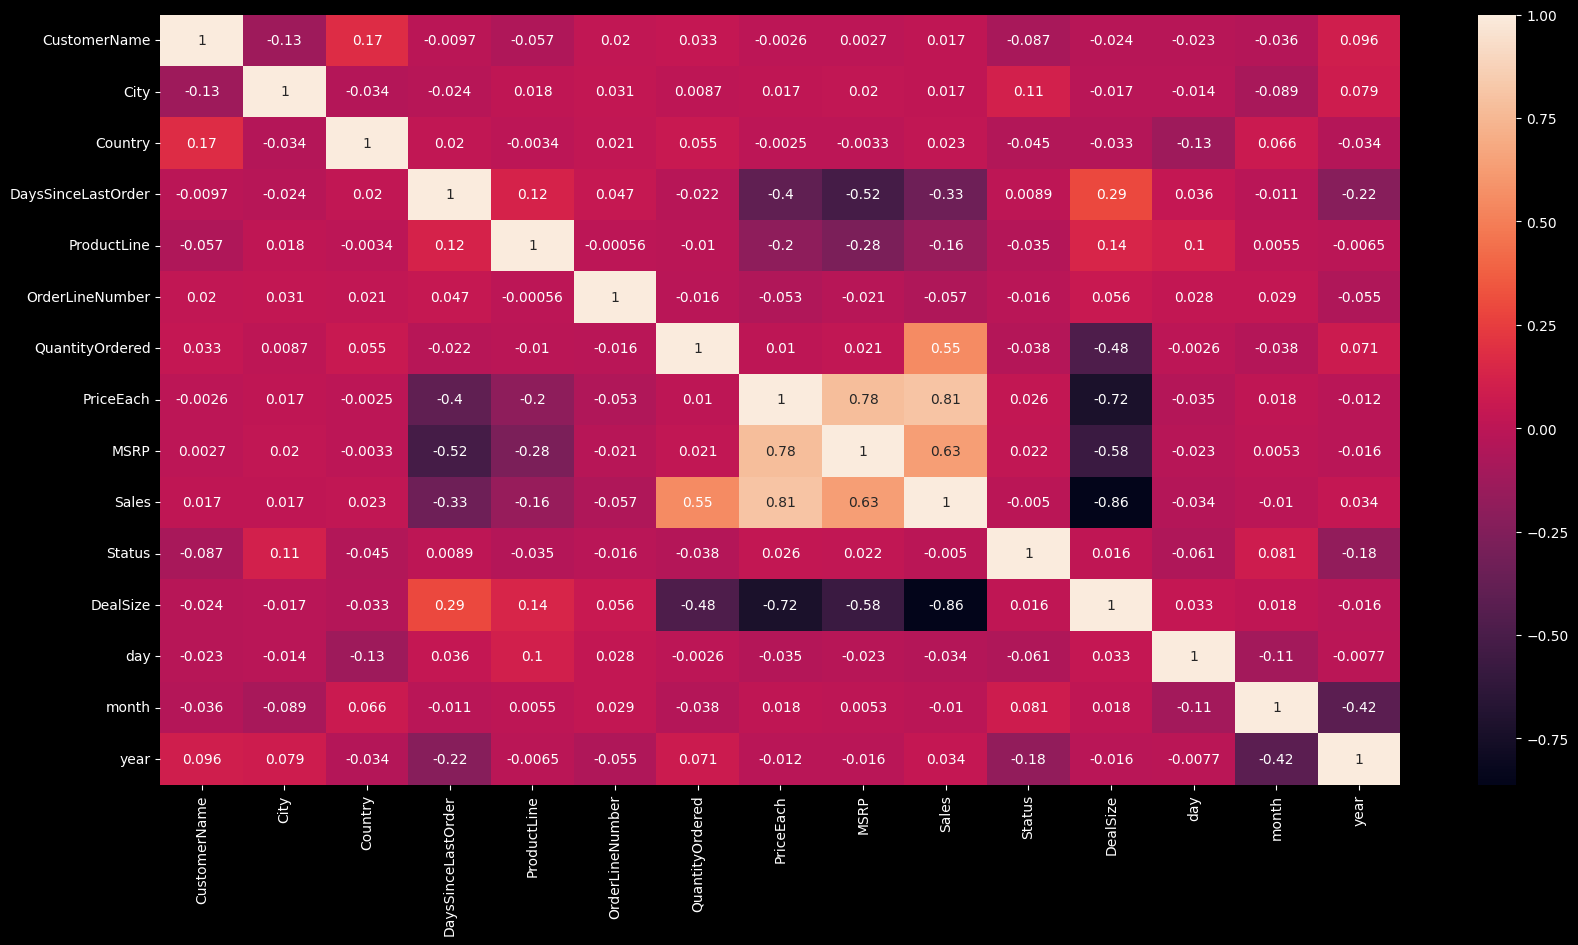

In [534]:
# Let us visualize the correlation matrix using a heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

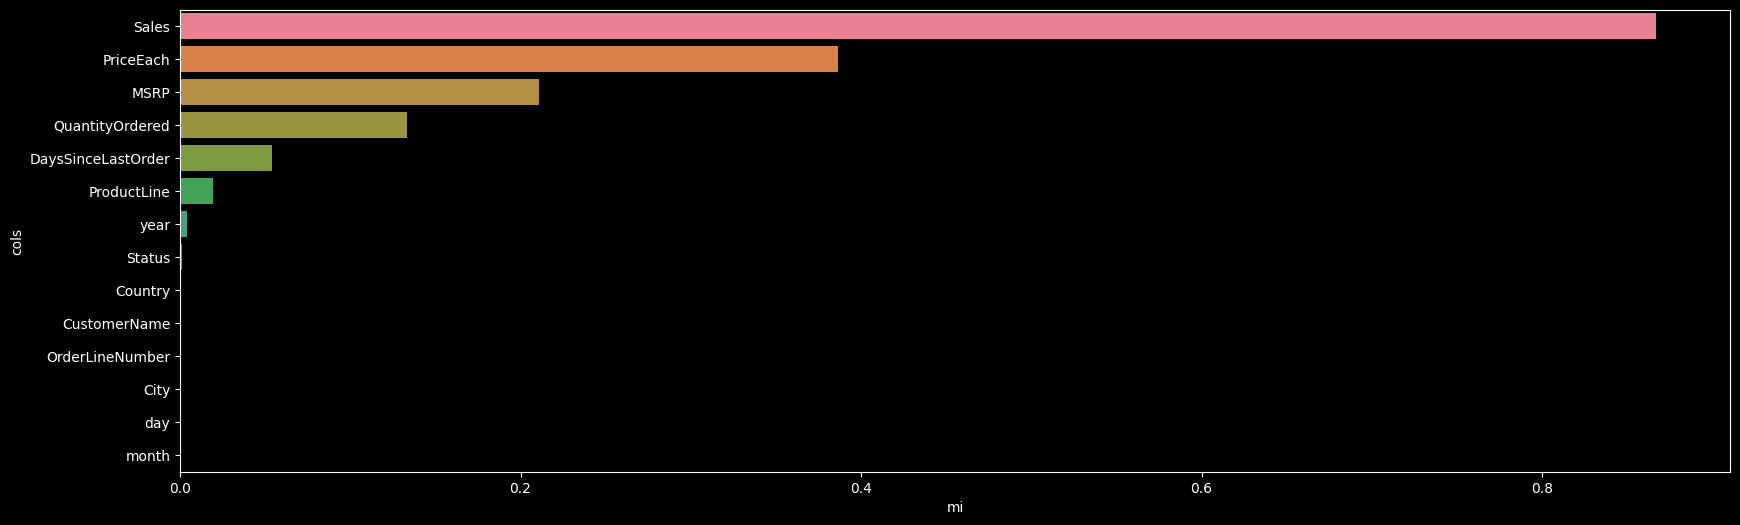

In [536]:
# let us calculate mutual information and visualize them using a bar plot

x=df.drop(columns='DealSize')
y=df['DealSize']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'cols':x.columns,'mi':mi})
mi_df.sort_values(by='mi',ascending=False,inplace=True)

plt.figure(figsize=(20,6))
sns.barplot(data=mi_df,y='cols',x='mi',hue='cols')
plt.show()

In [539]:
x_t,xte,y_t,yte=train_test_split(x,y,test_size=0.2,random_state=20)
print(x_t.shape,xte.shape,y_t.shape,yte.shape)

(2197, 14) (550, 14) (2197,) (550,)


# Model

In [546]:
rf=RandomForestClassifier()
mod=rf.fit(x_t,y_t)
predt=mod.predict(x_t)
crt=classification_report(y_t,predt)
cmt=confusion_matrix(y_t,predt)

In [545]:
pred=mod.predict(xte)
cr=classification_report(yte,pred)
cm=confusion_matrix(yte,pred)

# Evaluation Metrics

Training


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00      1072
           2       1.00      1.00      1.00      1003

    accuracy                           1.00      2197
   macro avg       1.00      1.00      1.00      2197
weighted avg       1.00      1.00      1.00      2197



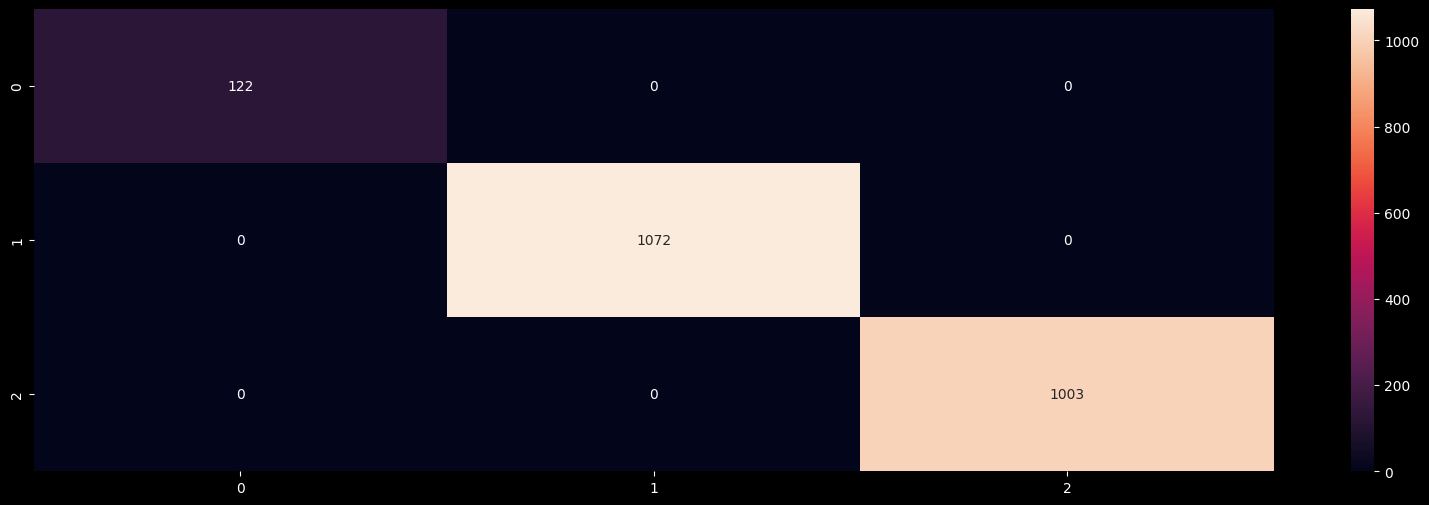

In [555]:
print("Training\n\n\n",crt)
plt.figure(figsize=(20,6))
sns.heatmap(cmt,annot=True,fmt='.0f')
plt.show()

Testing


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00       277
           2       1.00      1.00      1.00       243

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550



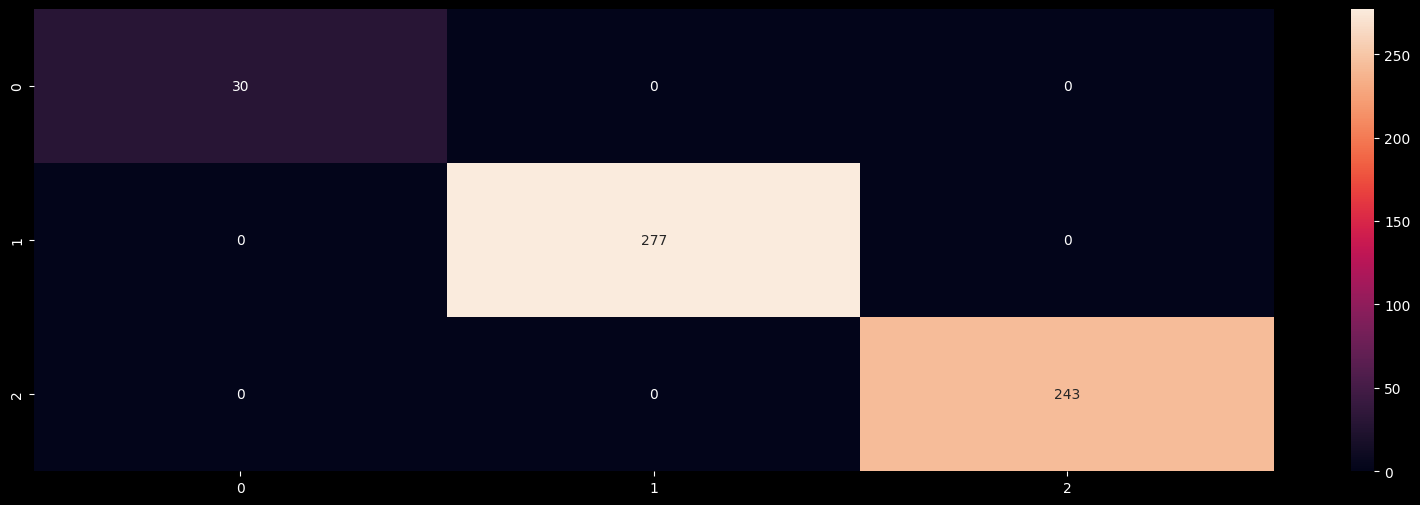

In [557]:
print("Testing\n\n\n",cr)
plt.figure(figsize=(20,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()